Jay Lee (jcl353), Jason Lee (shl235) 
Project Phase 2 

# INFO 2950 Final Project Phase 2

## Research Question: 
How have fertility rates fluctuated over the years of 1960-2021? How are these trends affected

The fertility rate in all, if not most countries is susceptible to fluctuation over period of time. Whether that may be due to a singular factor or a result of intricate relationships of multiple factors, we are intrigued to possibly compare and identify different factors that might play a significant role in the fluctuation of fertility rate across differnt countries. We have collected publicly available data with statistics on fertility rate of OECD (The Organization for Economic Cooperation and Development) in the last decade along with other notable statistics about those countries such as GDP, Health Spending, Employment Rate, Adult Education Level, and Internet Access. We are analzying this data to identify patterns in the possible relationships these attributes might have on the fertility rate across different countries over time.

Fertility rate in a specific year is described as the total number of children that would be born to each woman given that she is able to live to the end of her child-bearing years and give birth to children in correspondence to the age-specific fertility rates. A total fertility rate of 2.1 children per woman ensures a broadly stable population assuming that there is an equilibrium in net migration and mortality. Together with mortality and migration, fertility rate reflects the effects of multifaceted development of a country, whether that may be economical, social, and/or more. 

## Data Collection and Cleaning: 
Our data is collected from OECD website. We collected the countries' Fertility Rates, GDP (Gross Domestic Product), Young Population, Elderly Population, Adult Education Level,and Access to Internet. It is also hosted on Google Drive. 

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import seaborn as sns
import numpy as np
import time


from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

#### Fertility Rates

These are the fertility rates of OECD countries from 1960-1970. In the cells below, the data is cleaned by removing insignificant datas. For example, data pertaining to "OECD Average" is unnecessary for the research as it looks into each specific country, rather than an average of the countries. In addition, some rows are renamed and/or removed to make the data simpler and more intuitive. The same procedures are followed for other sets of data as well.

In [3]:
fertility_rates_df = pd.read_csv('/Users/jaylee/Downloads/2950finalprojectcsv/Fertility_Rates.csv')

#Renaming the columns 
fertility_rates_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1, inplace=True)

fertility_rates_df.columns
fertility_rates_df.columns = ['Country','Year','FertilityRate']

print(fertility_rates_df.shape)

#Rows with the Country value 'OAVG' is removed 
fertility_rates_df = fertility_rates_df.drop(fertility_rates_df.index[fertility_rates_df['Country'].isin(['OAVG' ])])

fertility_rates_df.head()


(380, 3)


Country  Year  FertilityRate
0     AUS  2011           1.92
1     AUS  2012           1.93
2     AUS  2013           1.88
3     AUS  2014           1.79
4     AUS  2015           1.79

#### Factor 1: GDP (Gross Domestic Product)  
Similar to Fertility Rates, the data regarding GDP is followed by similar procedures for cleaning. To make sure the number rows match the previous set of data, we went through the data and removed any excess data, such as "OECD".

In [5]:
GDP_df = pd.read_csv('/Users/jaylee/Downloads/2950finalprojectcsv/GDP.csv')

#Renaming the columns 
GDP_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1, inplace=True)

GDP_df.columns
GDP_df.columns = ['Country','Year','GDP (US Dollar/Capita)']


#Rows with the Country value 'OECD' is removed 
GDP_df = GDP_df.drop(GDP_df.index[GDP_df['Country'].isin(['OECD'])])

print(GDP_df.shape)


GDP_df.head()

(380, 3)


Country  Year  GDP (US Dollar/Capita)
0     AUS  2011            44429.559507
1     AUS  2012            43883.378891
2     AUS  2013            47761.901259
3     AUS  2014            47603.880878
4     AUS  2015            47232.629120

#### Factor 2: Employment Rate
The original set of Employment Rate data consisted a total of 389 rows. Upon closer inspection, we cleaned up the data by removing set of datas with 'OECD' like the data sets above. However, this set of data was missing a value in employment rate, specifically Mexico in 2020. Thus, the data was physically manipulated to include NaN in order to keep the number of rows in the data consistent.

In [26]:
Employment_rate_df = pd.read_csv('/Users/jaylee/Documents/github/INFO-2950-Project/Employment_Rates.csv')

#Renaming the columns 
Employment_rate_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1, inplace=True)

Employment_rate_df.columns
Employment_rate_df.columns = ['Country','Year','EmploymentRate']


#Rows with the Country value 'OECD' is removed 
Employment_rate_df = Employment_rate_df.drop(Employment_rate_df.index[Employment_rate_df['Country'].isin(['OECD'])])
print(Employment_rate_df.shape)
Employment_rate_df.head()

(379, 3)


Country  Year  EmploymentRate
0     AUS  2011        72.65694
1     AUS  2012        72.34558
2     AUS  2013        71.97044
3     AUS  2014        71.56635
4     AUS  2015        72.15796

#### Factor 3: Health Spending  

In [39]:
Health_spending_df = pd.read_csv('/Users/jaylee/Documents/github/INFO-2950-Project/Health_Spending.csv')

#Renaming the columns 
Health_spending_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1, inplace=True)

Health_spending_df.columns
Health_spending_df.columns = ['Country','Year','Health Spending (US Dollar/Capita)']


#Rows with the Country value 'OECD' is removed 
Health_spending_df = Health_spending_df.drop(Health_spending_df.index[Health_spending_df['Country'].isin(['OECD'])])
print(Health_spending_df.shape)
Health_spending_df.head()

(380, 3)


Country  Year  Health Spending (US Dollar/Capita)
0     AUS  2011                            3809.112
1     AUS  2012                            3854.190
2     AUS  2013                            4087.849
3     AUS  2014                            4562.730
4     AUS  2015                            4777.388

#### Factor 4: Internet Access Data 

In [30]:
Internet_access_df = pd.read_csv('/Users/jaylee/Documents/github/INFO-2950-Project/Internet_Access.csv')

#Renaming the columns 
Internet_access_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1, inplace=True)

Internet_access_df.columns
Internet_access_df.columns = ['Country','Year','Internet Access']


#Rows with the Country value 'OECD' is removed 
Internet_access_df = Internet_access_df.drop(Internet_access_df.index[Internet_access_df['Country'].isin(['OECD'])])
print(Internet_access_df.shape)
Internet_access_df.head()

(335, 3)


Country  Year  Internet Access
0     AUS  2012          83.0000
1     AUS  2014          85.8900
2     AUS  2016          86.1100
3     AUT  2011          75.4407
4     AUT  2012          79.2846

#### Factor 5: Percentage of Tertiary Education Received

In [31]:
Tertiary_education_df = pd.read_csv('/Users/jaylee/Documents/github/INFO-2950-Project/Tertiary_Education.csv')

#Renaming the columns 
Tertiary_education_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1, inplace=True)

Tertiary_education_df.columns
Tertiary_education_df.columns = ['Country','Year','Percentage (25-64yrs)']


#Rows with the Country value 'OECD' is removed 
Tertiary_education_df = Tertiary_education_df.drop(Tertiary_education_df.index[Tertiary_education_df['Country'].isin(['OECD','OAVG','G20',])])
print(Tertiary_education_df.shape)
Tertiary_education_df.head()


(368, 3)


Country  Year  Percentage (25-64yrs)
0     AUS  2011              38.342072
1     AUS  2012              41.282364
2     AUS  2013              39.539928
3     AUS  2014              41.901855
4     AUS  2015              42.888756

#### Comprehensive View 

In [32]:
Comp_view = fertility_rates_df.merge(GDP_df, on=['Country','Year']).merge(Health_spending_df, on=['Country','Year']).merge(Employment_rate_df, on=['Country','Year']).merge(Tertiary_education_df, on=['Country','Year']).merge(Internet_access_df, on= ['Country','Year'])

print(Comp_view.shape)

Comp_view

(326, 8)


Country  Year  FertilityRate  GDP (US Dollar/Capita)  \
0       AUS  2012           1.93            43883.378891   
1       AUS  2014           1.79            47603.880878   
2       AUS  2016           1.79            50150.652199   
3       AUT  2011           1.43            44469.209642   
4       AUT  2012           1.44            46477.655075   
..      ...   ...            ...                     ...   
321     CRI  2016           1.79            19119.336147   
322     CRI  2017           1.77            20368.230268   
323     CRI  2018           1.75            21312.713380   
324     CRI  2019           1.74            22598.071946   
325     CRI  2020           1.72            22180.992040   

     HealthSpending(US Dollar/Capita)  EmploymentRate  Percentage (25-64yrs)  \
0                            3854.190        72.34558              41.282364   
1                            4562.730        71.56635              41.901855   
2                            5037.334        72.43150              43.743900   
3                            4345.158        71.10000              27.956152   
4                            4588.344        71.42500              28.739943   
..                                ...             ...                    ...   
321                          1413.267        58.71328              22.998714   
322                          1445.438        59.78690              22.989092   
323                          1529.721        60.95155              22.601564   
324                          1556.168        61.64743              25.066828   
325                          1622.353        54.83073              25.112001   

     Internet Access  
0          83.000000  
1          85.890000  
2          86.110000  
3          75.440700  
4          79.284600  
..               ...  
321        64.841642  
322        68.567758  
323        73.080247  
324        86.338086  
325        84.693014  

[326 rows x 8 columns]

## Data Description: 


*What are the observations (rows) and the attributes (columns)?*

Each observation represents the data collected about the given country every year. Each attribute is values of that given category pertaining to each country. The following features are recorded for each country and year.


Object field:

Country: The name of the country registered in OECD (string)


Country Data:

Country: Name of the OECD country
Year: Year the row of dats pertains to. From 2011 to 2020.
FertilityRate: Fertility Rate (Children/Woman)
GDP: Gross Domestic Product (US Dollar/Capita)
Health Spending: Health Spending (US Dollar/Capita)
EmploymentRate: Employment rate % of total working population (25-64yrs)
Internet Access: Internet access % of all households
Percentage: Tertiary education rate % of total working population (25-64yrs)


*Why was this dataset created?*

This dataset was created to document the various stastical information of countries. The dataset allows the public users to not only compare and contrast statistical trends of a country, but also among different countries as well .

*Who funded the creation of the dataset?*

The creation of the dataset was funded by OECD, also known as Organisation for Economic Co-operation and Development.

*What process might have influenced what data was observed and recorded and what was not?*

Much of the data that is available is multi-faceted. Meaning,the data observed and recorded was most likely influenced by whether the data set provides an insight on the degree of development of countries over time. Conversely, data/information that might be deemed inadequate in illustrating the degree of development of countries most likely was not observed and recorded.

*What preprocessing was done, and how did the data come to be in the form that you are using?*

The data didn't require intensive preprocessing since the datasets were well-processed and organized by OECD. However, our preprocessing mostly consisted of removing any excess columns of datas that were insignifcant to our research and renaming the columns and variables to be more informative. The last of preprocessing consisted of joining the different datasets together to provide a comprehensive overview of the data we collected.

*If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?*

The subject of this data collection are OECD countries. They were aware of the data collection since the creation of the dataset is funded by OECD organization. They likely expected the data to be observed and used by public users for various uses, whether that may be educational, recreational, and/or more.

*Does the dataset identify any subpopulations (e.g., by age, gender)?*

While not all the datasets identify any subpopulations, datasets regarding Employment Rate and Tertiary Education are based on working age, which ranges from 25 to 64 years old.

*Is the dataset self-contained,or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)?*

The dataset relies on external resources, specifically the initial dataset that was provided by OECD. The datasets will remain constant over time, with additional datas updated every year. There aren't explicit archival versions, however, the OECD website itself is archival in the sense that the datas will be preserved as long as the organization still exists. There aren't any limitations associated with the external resources as they are available to the public for general use.

*Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)*

https://drive.google.com/drive/folders/100_ZZScW3yAXBZ9k2wZW5fegNIw2HC6G?usp=sharing


## Data Limitations: 


- As of right now, there are a couple of possible limitations regarding the datasets. For example, some countries in different datasets had missing values. Although the missing values have been replaced with NaN, the missing values certainly detract from true comparison among countries. In fact, in the dataset for internet access, data for Japan was not included. While the data could have been retrieved from different organization, the data wasn't used due to the fact that the method of data collecting might be inconsistent with that of OECD.

- In addition, because the time frame has been limited to only a decade, the datasets might not exhibit strong enough variability that allows us to observe any distinct or interesting patterns/relationships between the datas.

- Similarly, the datas that have been collected are limited to countries that are a part of OECD, Organisation for Economic Co-operation and Development. These countries are relatively more developed than the countries that are not part of the organization. For this reason, the countries can exhibit trends that are too similar of one another. While this might not exactly be a limitation, it can limit the amount of retrievable information from data anlysis.

- We can possibly sort the individual linear regressions graphs and assign them into continents to make better use of the space. In doing so, there will be fewer graphs with no changes to the amount of information delivered. Moreover, several graphs below fail to account for important outlier points or certain increase/decrease curvatures. Hence, the accuracy of these graphs are lacking, in which could be areas that could be improved in the later phases. 

## Exploratory Data Analysis: 


#### Scatterplots 

##### Fertility Rates

<AxesSubplot:xlabel='Year', ylabel='FertilityRate'>

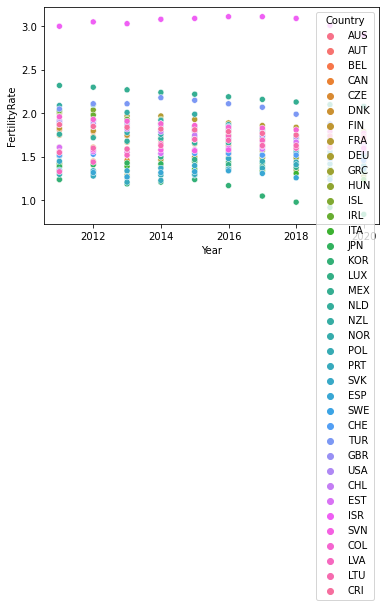

In [42]:
sns.scatterplot(x="Year", y="FertilityRate", hue="Country", data= fertility_rates_df)

From this scatterplot, the one outlying country is starkly distant from the rest of the other points and also possesses the highest fertility rates. Moreover, the graph is fairly distributed, excluding the one outlying country. 

##### GDP (Gross Domestic Product)

<AxesSubplot:xlabel='Year', ylabel='GDP (US Dollar/Capita)'>

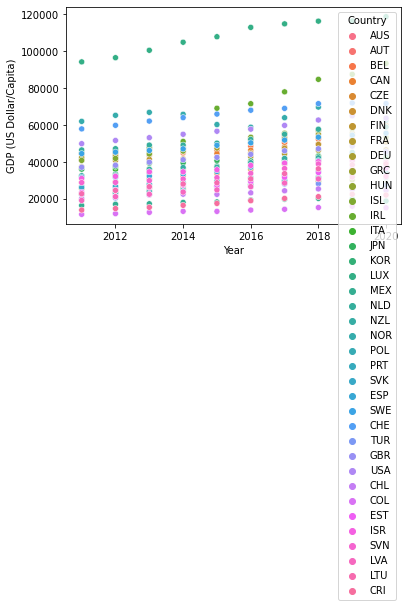

In [43]:
sns.scatterplot(x="Year", y="GDP (US Dollar/Capita)", hue="Country", data= GDP_df)

From this scatterplot, we can also observe the one outlying country that is starkly distant from the rest of the other points. Possessing the highest GDP, these outliers are consistent the highest per year.  Moreover, the rest of the graph is fairly distributed when excluding the one outlying country. 

##### Employment Rate

<AxesSubplot:xlabel='Year', ylabel='EmploymentRate'>

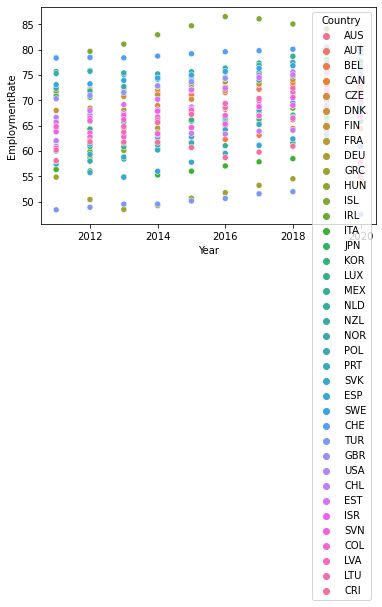

In [44]:
sns.scatterplot(x="Year", y="EmploymentRate", hue="Country", data= Employment_rate_df)

Unlike the first two graphs, this graph possesses no dramatic outliers. All the countries remain moderately consistent throughout the years. However, to note, the green and blue countries do consistently secure the highest in employment rates every year. 

##### Health Spending 

<AxesSubplot:xlabel='Year', ylabel='Health Spending (US Dollar/Capita)'>

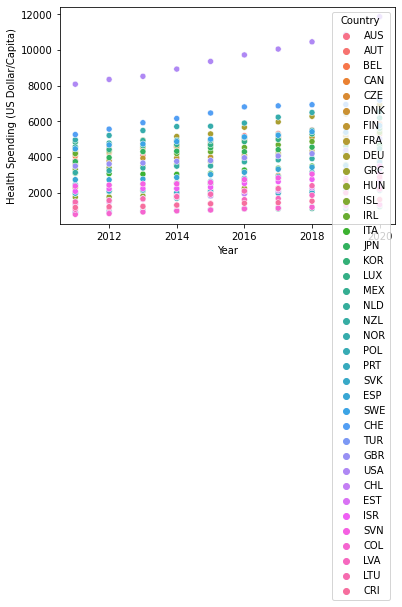

In [47]:
sns.scatterplot(x="Year", y="Health Spending (US Dollar/Capita)", hue="Country", data= Health_spending_df)

Generally, over the decade, there is a steady overall increase in health spending in all countries. Some countries exhibit greater growth. There is also an outlier, specifically Great Britain, where not only does it exhibit higher health spending since 2011, the growth from 2013 to 2020 is relatively greater than other countries.

##### Internet Access Data

<AxesSubplot:xlabel='Year', ylabel='Internet Access'>

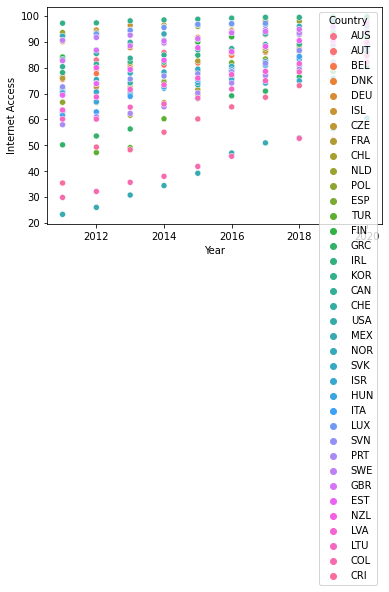

In [49]:
sns.scatterplot(x="Year", y="Internet Access", hue="Country", data= Internet_access_df)

There is generally an increase in internet access among the countries throughout the time period. However, some countries exhibit little to no growth, while others show more rapid growth. For example, countries such as Korea exhibit extremely high rate of internet access from the beginning, while some countries begin with significantly lower rate of internet access and exhibit rapid growth although the percent of internet access is still significantly lower than other countries. 

##### Percentage of Tertiary Education Received

<AxesSubplot:xlabel='Year', ylabel='Percentage (25-64yrs)'>

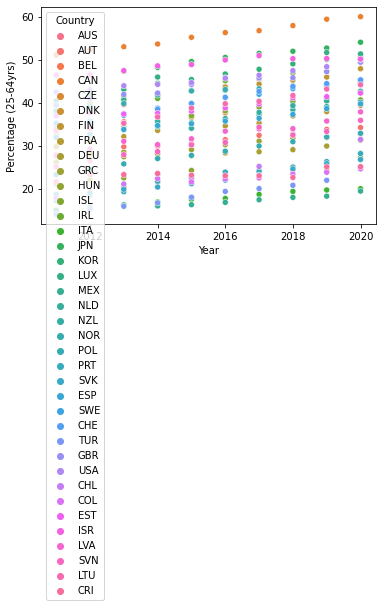

In [51]:
sns.scatterplot(x="Year", y="Percentage (25-64yrs)", hue="Country", data= Tertiary_education_df)

For this scatterplot, it is important to note the range of distribution for each year. Some countries have high of a percentage as 50-60, some exhibit as low as 20-25 percent. It’s also interesting that some countries that initially exhibit high percentage show even greater growth than those with low percentage since one would expect the former to be more stagnant and the latter to go through dynamic growth. 

#### Linear Regression Comparisons 

Slope coefficients can be interpreted as the change in the probability that Y equals 1 resulting from a unit increase in Xi when the remaining independent variables are held constant. We want to calculate the slope coefficients of all the examined factors, as well as the fertility rate, to construct the linear regression graphs. In doing so, we were able to assess and account for the annual changes in the given decade. By distinguishing each graph by its country, we collected a wide basis of data to determine any correlations between the five factors of GDP, teritiary education, internet access, employment rate, and health spending on the fertility rate of each country. While we have yet to include all these factors in a single graph with the linear regression of fertility rates, the reader can still observe the changes in rates over the years. We achieved these results by devising two functions. The first function worked to get the slope coefficients of each (x (constant: Year) , y(the value of each rate)), and following this, the second function then worked to plot the regression graphs, with these coefficients. Then, to note in this function, we effectively assigned the parameter, hue, to 'Country' to observe the changes in each of these countries in relation to the five factors. 

#### Fertility Rate: Linear Regression per Country

In [16]:
# Define your function for FertilityRate 
def slope_coefficient(df):
    x= df[['Year']]
    y= df[['FertilityRate']]
    model= LinearRegression().fit(x, y)
    return model.coef_


#applying functions to the different datasets
fert_data = fertility_rates_df.groupby('Country')
print(fert_data.apply(slope_coefficient)) 

    

Country
AUS      [[-0.03515151515151513]]
AUT      [[0.003939393939393942]]
BEL      [[-0.01993939393939393]]
CAN      [[-0.01624242424242425]]
CHE     [[-0.005757575757575762]]
CHL     [[-0.030909090909090903]]
COL     [[-0.020363636363636344]]
CRI     [[-0.016606060606060614]]
CZE       [[0.03715151515151514]]
DEU       [[0.02006060606060607]]
DNK    [[-0.0022424242424242437]]
ESP     [[-0.002727272727272728]]
EST      [[0.008181818181818169]]
FIN      [[-0.05896969696969695]]
FRA      [[-0.02442424242424241]]
GBR      [[-0.03727272727272726]]
GRC     [[-0.003090909090909083]]
HUN      [[0.027939393939393934]]
IRL      [[-0.04133333333333332]]
ISL      [[-0.03969696969696969]]
ISR     [[-0.004666666666666673]]
ITA     [[-0.019333333333333313]]
JPN     [[-0.005575757575757557]]
KOR     [[-0.047636363636363616]]
LTU        [[0.0092121212121212]]
LUX     [[-0.024909090909090898]]
LVA       [[0.03296969696969696]]
MEX     [[-0.027454545454545426]]
NLD      [[-0.02218181818181816]]
NOR   

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Empty DataFrame
Columns: []
Index: []

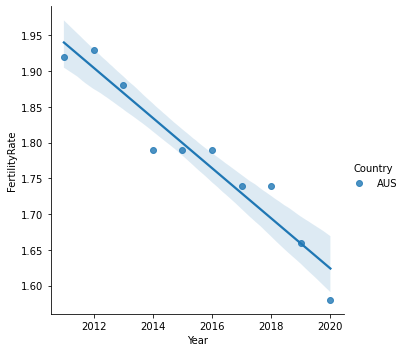

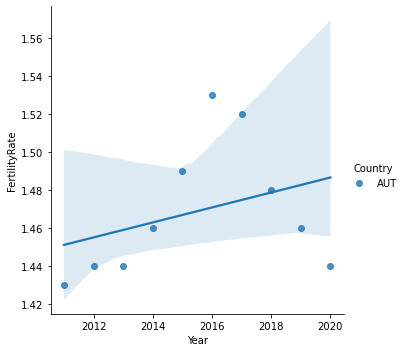

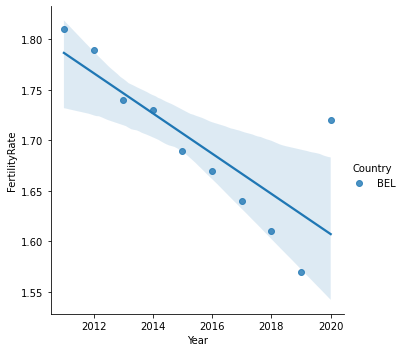

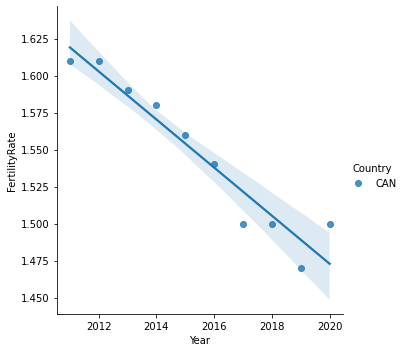

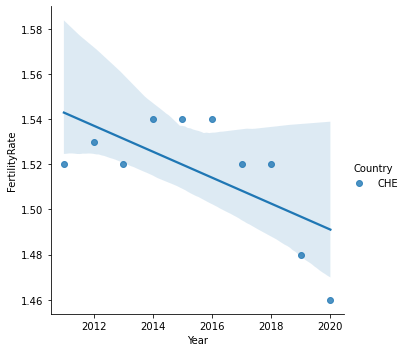

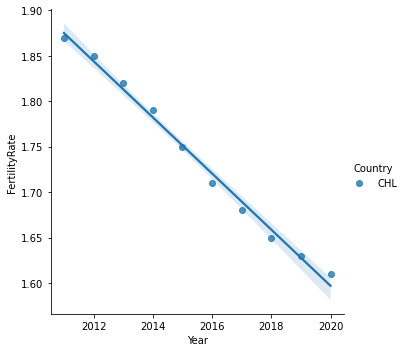

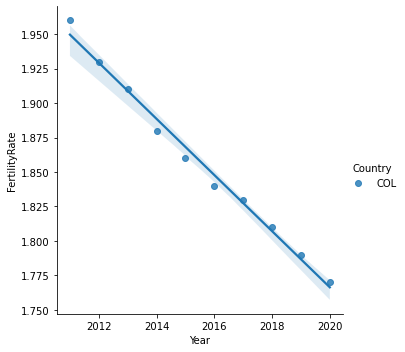

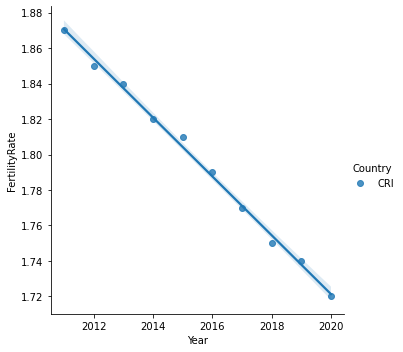

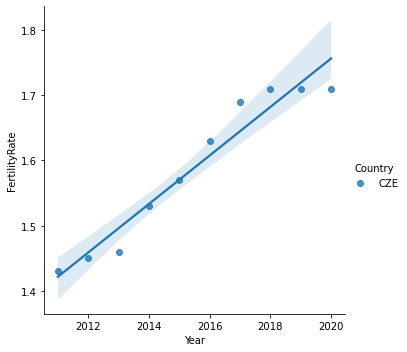

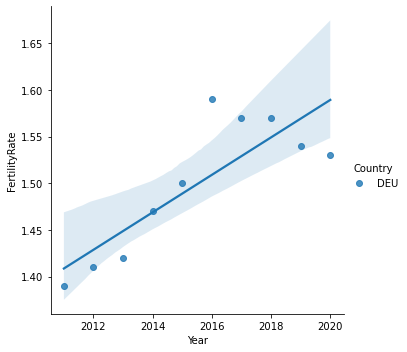

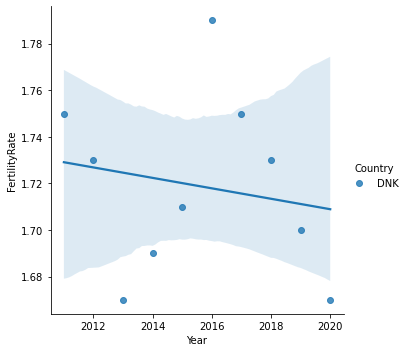

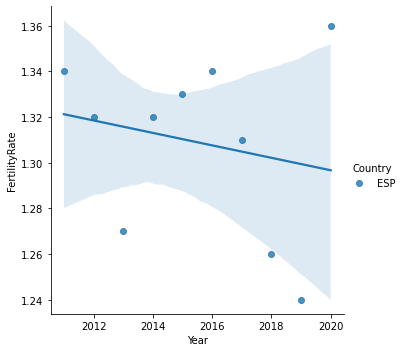

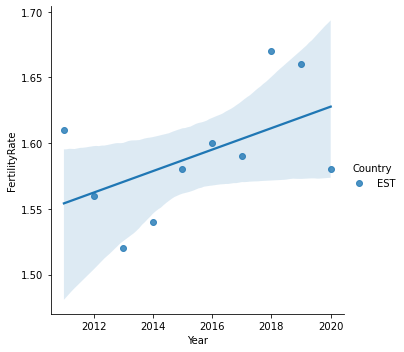

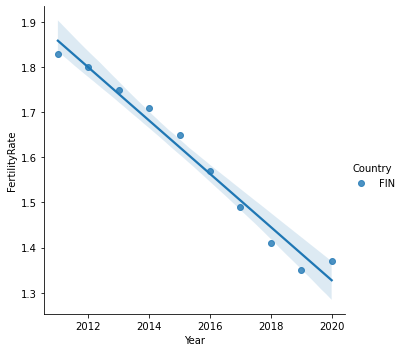

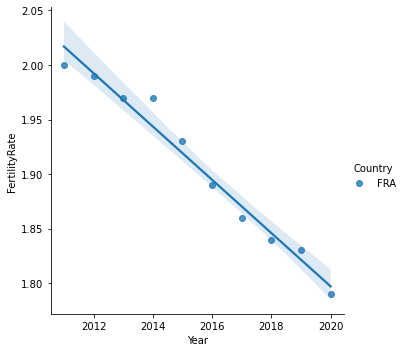

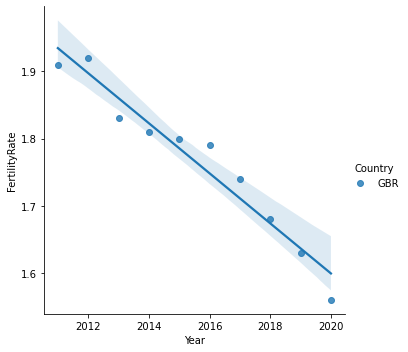

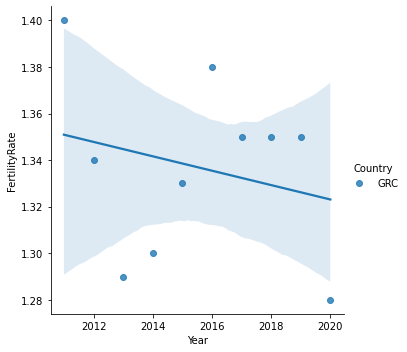

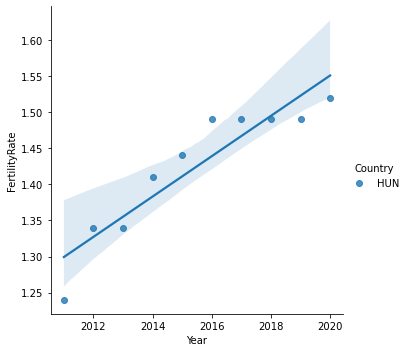

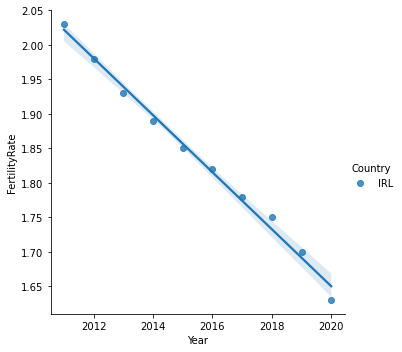

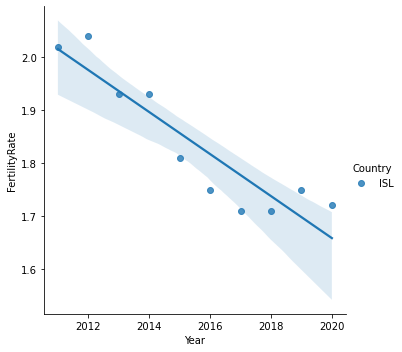

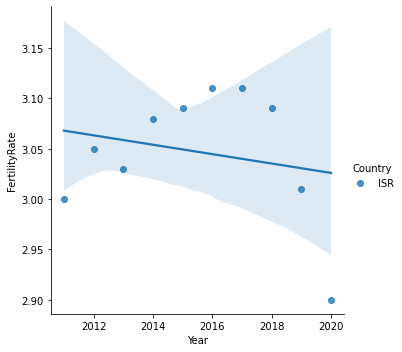

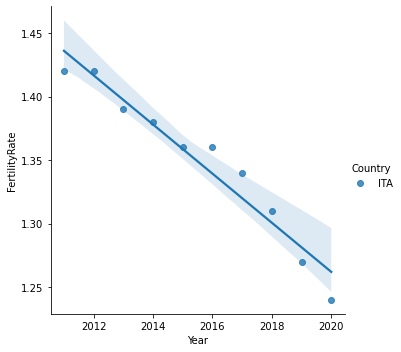

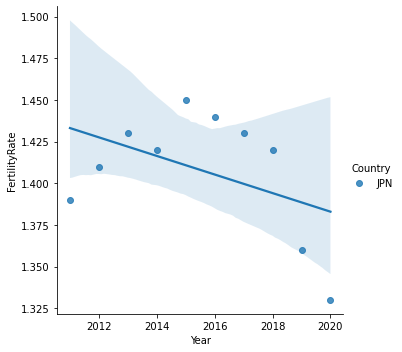

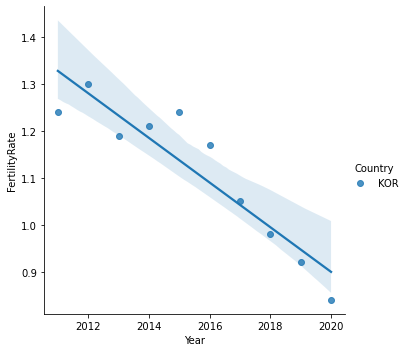

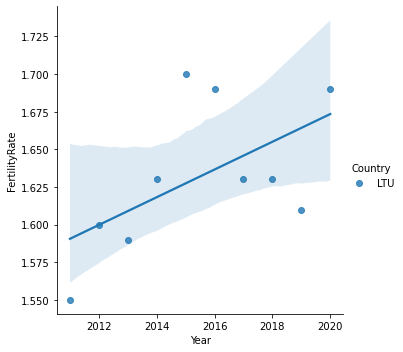

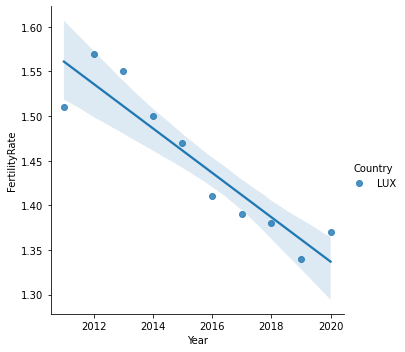

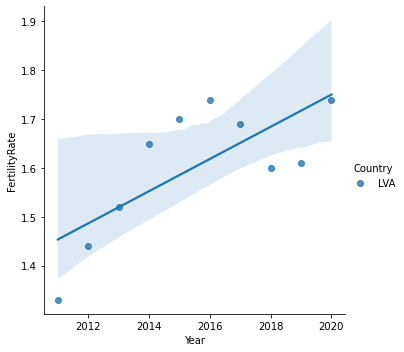

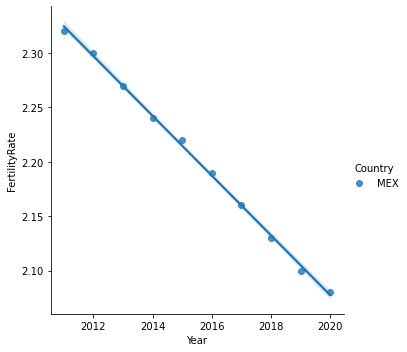

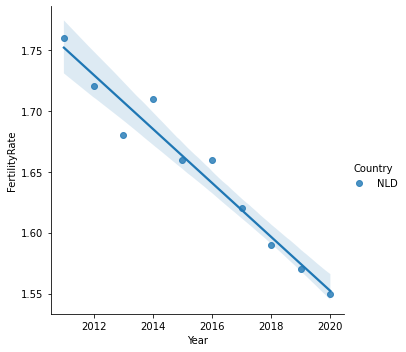

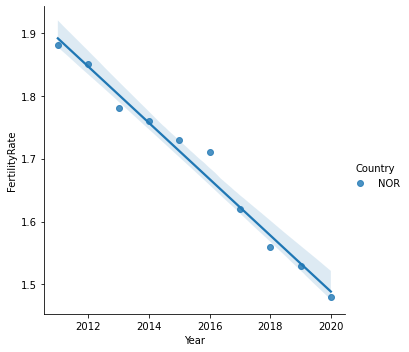

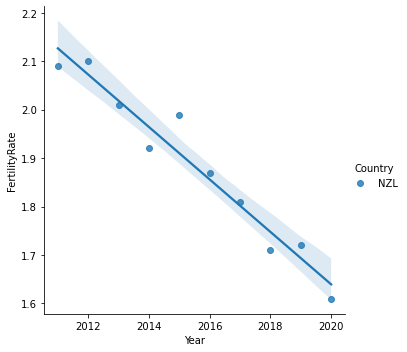

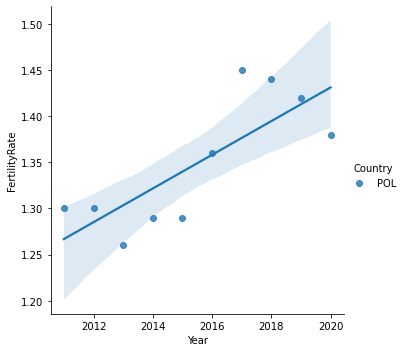

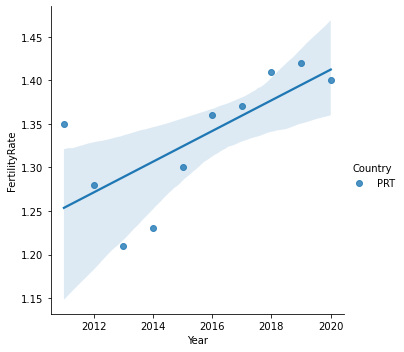

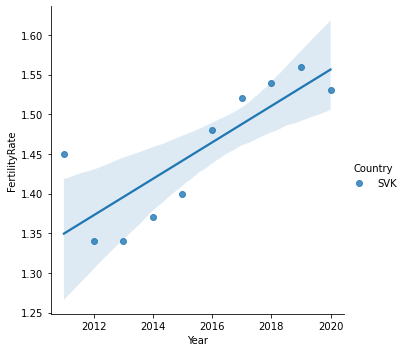

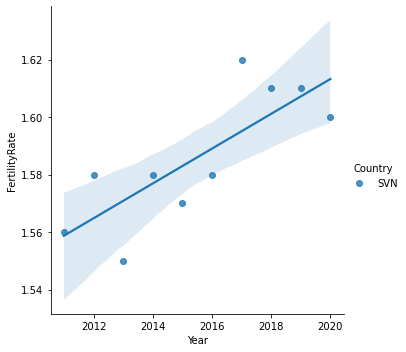

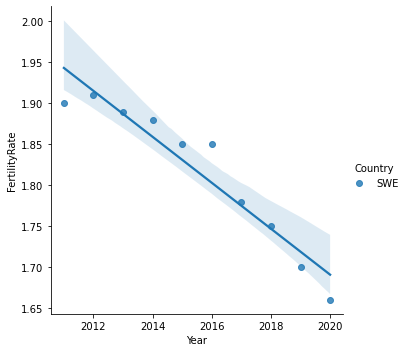

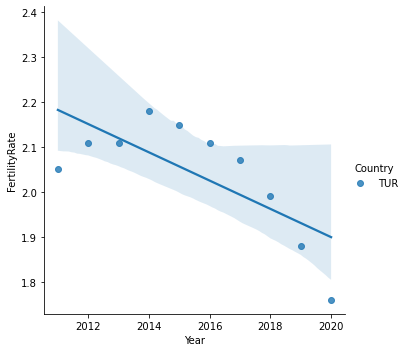

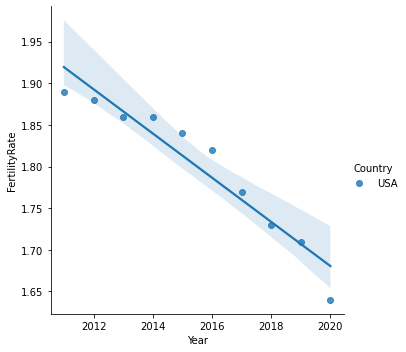

In [17]:
# Create plotting function for FertilityRate
def plot_by_loc(i, column):
    sns.lmplot(data=i, x='Year', y=column, hue='Country')
        
# applying this function to get linear regression graphs per country       
fertility_rates_df.groupby('Country').apply(plot_by_loc, 'FertilityRate')



#### GDP: Linear Regression per Country

In [18]:
# Define your function for GDP
def slope_coefficient(df):
    x= df[['Year']]
    y= df[['GDP (US Dollar/Capita)']]
    model= LinearRegression().fit(x, y)
    return model.coef_


#applying functions to this dataset
GDP_data = GDP_df.groupby('Country')
print(GDP_data.apply(slope_coefficient)) 


Country
AUS    [[1216.0840221333328]]
AUT    [[1503.6956587212114]]
BEL     [[1574.865557236363]]
CAN     [[791.3965878787881]]
CHE    [[1652.5133885090895]]
CHL     [[531.0889491212117]]
COL     [[470.2415887393937]]
CRI    [[1023.0911738242423]]
CZE    [[1711.9000730909088]]
DEU    [[1663.5227626606058]]
DNK    [[1914.9590313454544]]
ESP    [[1121.2879300303034]]
EST    [[1525.2749281030299]]
FIN    [[1312.9579330303027]]
FRA    [[1269.5869720484845]]
GBR    [[1214.9394241393934]]
GRC    [[507.53084004242413]]
HUN    [[1301.8089540121211]]
IRL     [[6004.894292684848]]
ISL    [[1964.7818066303028]]
ISR    [[1097.8856019090906]]
ITA    [[1007.5472290545447]]
JPN     [[654.3246626121207]]
KOR     [[1481.040557787878]]
LTU    [[1879.0300123333325]]
LUX     [[2868.588416963636]]
LVA    [[1512.4413189212116]]
MEX     [[382.1531401575754]]
NLD    [[1552.8727124121212]]
NOR    [[136.86453318787858]]
NZL     [[1474.841216909091]]
POL    [[1385.5313577515146]]
PRT    [[1122.9400339272725]]
SV

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Empty DataFrame
Columns: []
Index: []

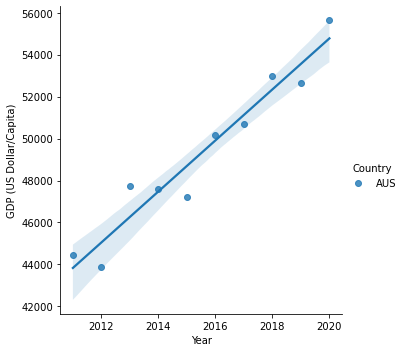

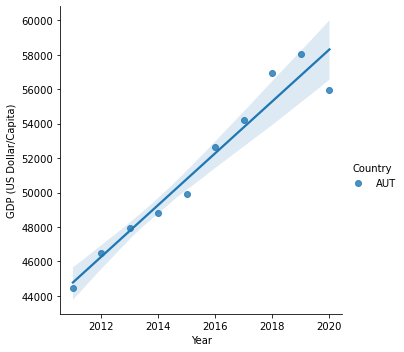

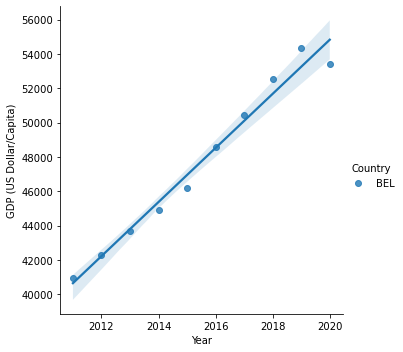

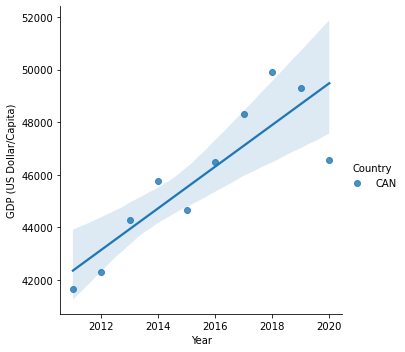

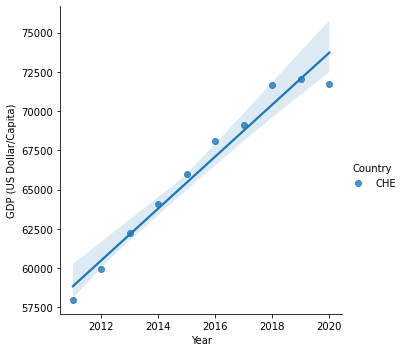

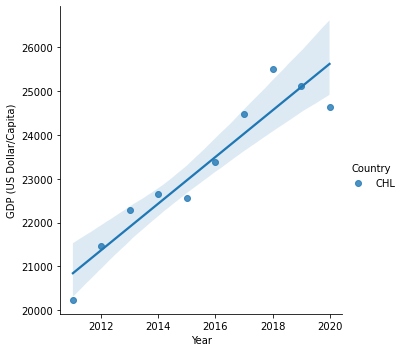

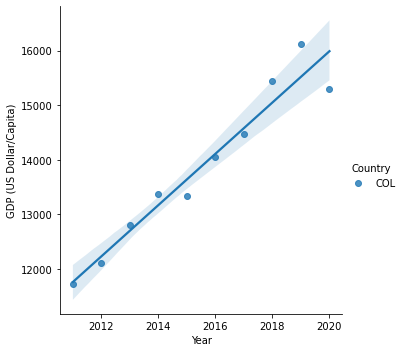

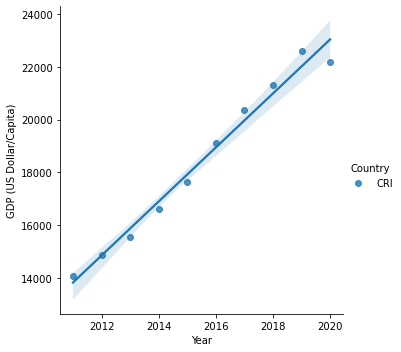

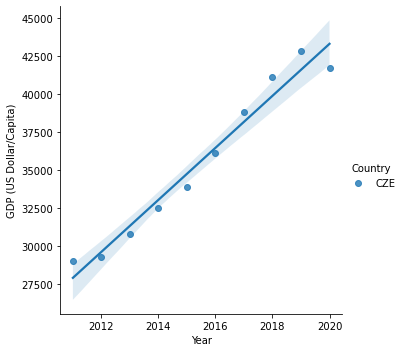

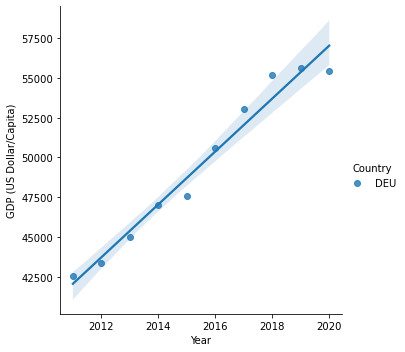

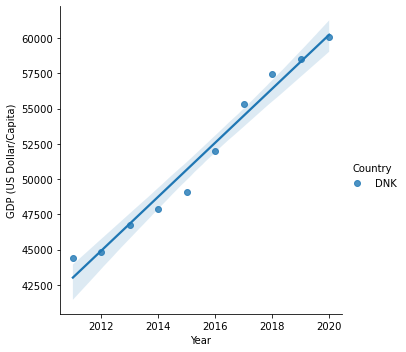

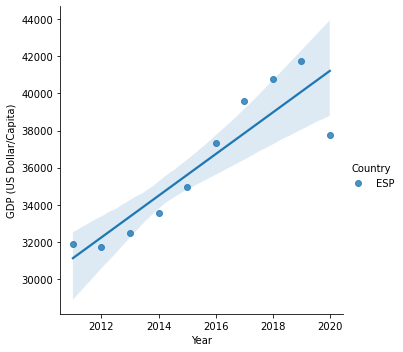

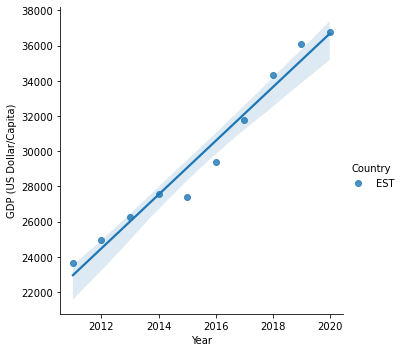

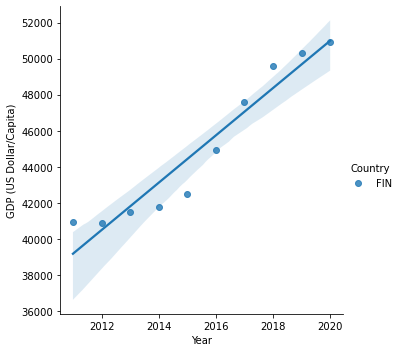

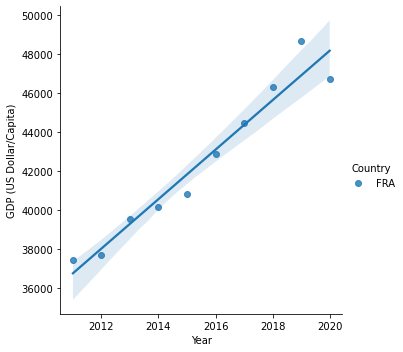

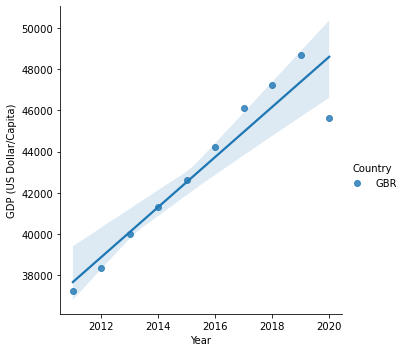

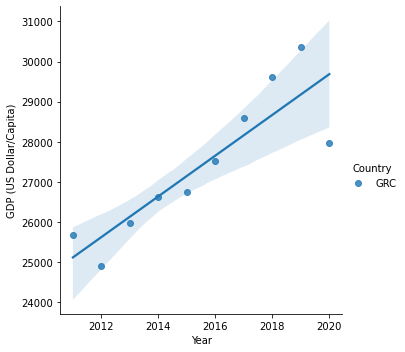

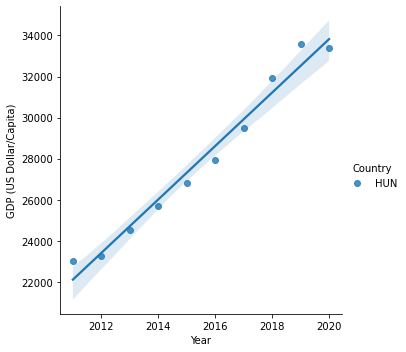

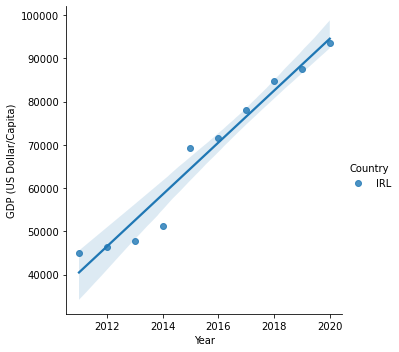

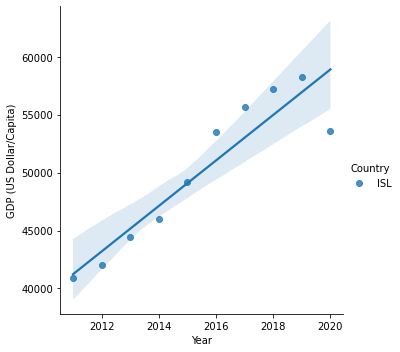

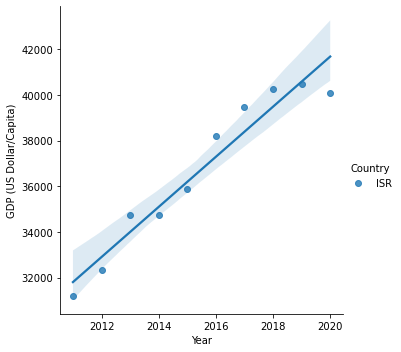

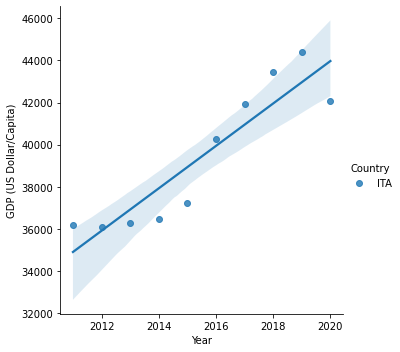

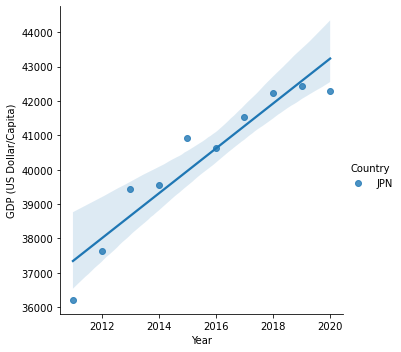

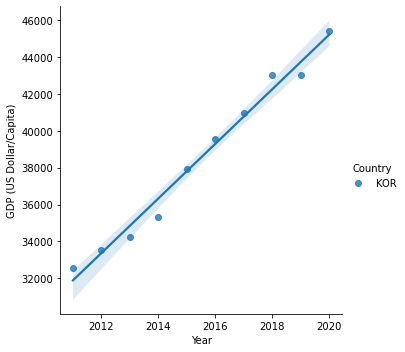

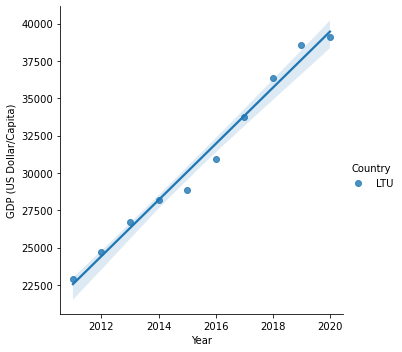

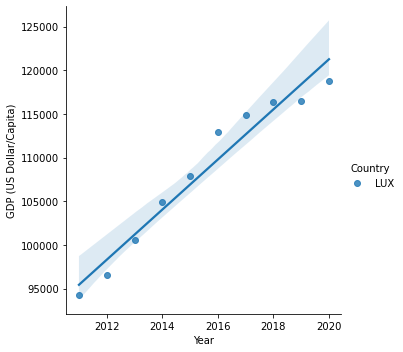

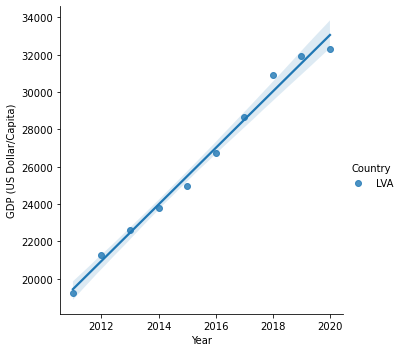

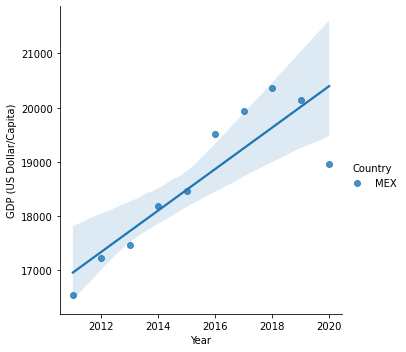

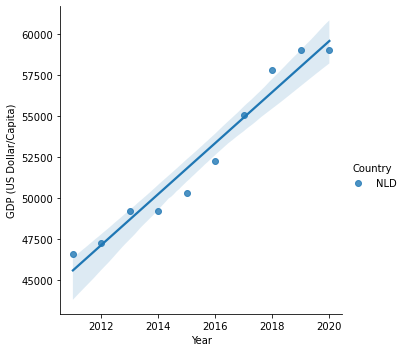

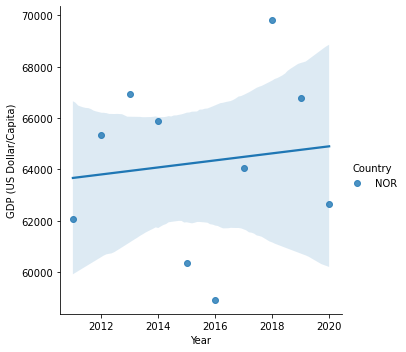

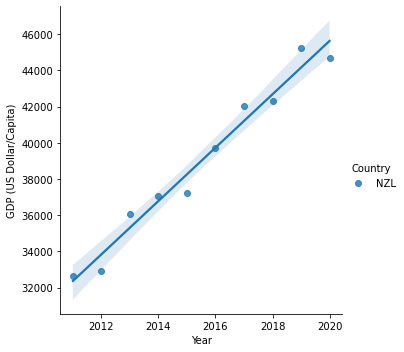

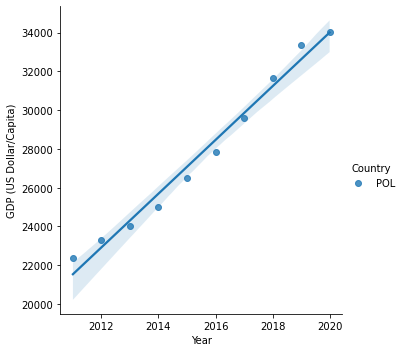

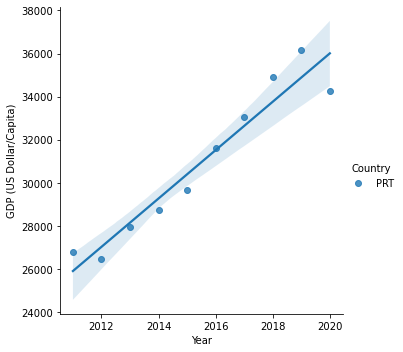

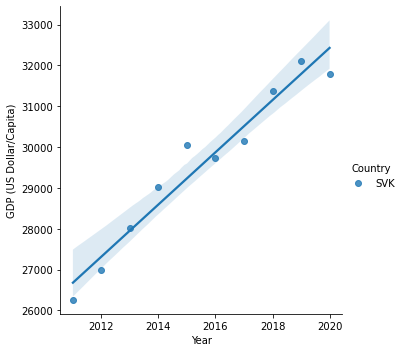

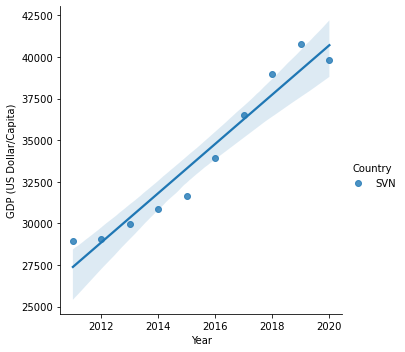

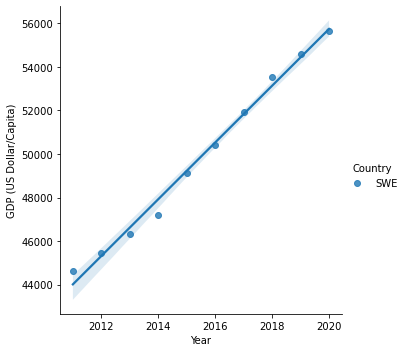

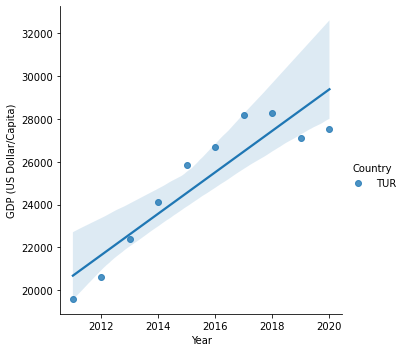

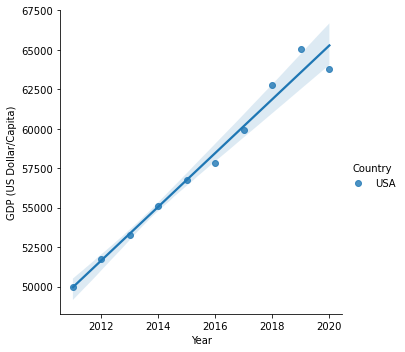

In [19]:
# Create plotting function for GDP
def plot_by_loc(i):
    sns.lmplot(data=i, x='Year', y='GDP (US Dollar/Capita)', hue='Country')
        
# applying this function to get graphs per country       
GDP_df.groupby('Country').apply(plot_by_loc)


#### Health Spending: Linear Regression per Country

In [40]:
# Define your function for Health Spending 
def slope_coefficient(df):
    x= df[['Year']]
    y= df[['Health Spending (US Dollar/Capita)']]
    model= LinearRegression().fit(x, y)
    return model.coef_


#applying function to this dataset
hs_data = Health_spending_df.groupby('Country')
print(hs_data.apply(slope_coefficient))



Country
AUS    [[197.72135151515147]]
AUT     [[160.4141393939393]]
BEL    [[151.86500606060605]]
CAN     [[163.7366484848484]]
CHE    [[208.54495151515147]]
CHL    [[118.26790303030297]]
COL     [[60.23298787878787]]
CRI    [[50.110199999999985]]
CZE     [[175.0438909090909]]
DEU     [[257.3738484848484]]
DNK    [[150.82626666666658]]
ESP    [[116.63728484848478]]
EST     [[141.9833757575757]]
FIN     [[95.47990909090903]]
FRA     [[133.3892606060605]]
GBR    [[138.01216363636354]]
GRC    [[31.427387878787858]]
HUN     [[60.85271515151513]]
IRL     [[116.6699454545454]]
ISL    [[143.18668484848484]]
ISR    [[101.12300606060604]]
ITA      [[77.3547333333333]]
JPN     [[85.26093333333328]]
KOR    [[179.44924848484845]]
LTU     [[154.9819272727272]]
LUX    [[107.48189696969696]]
LVA    [[124.51312727272723]]
MEX      [[29.1356909090909]]
NLD     [[149.2175333333333]]
NOR     [[180.6690727272727]]
NZL    [[139.46102424242417]]
POL     [[91.68692727272725]]
PRT    [[109.52729090909088]]
SV

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Empty DataFrame
Columns: []
Index: []

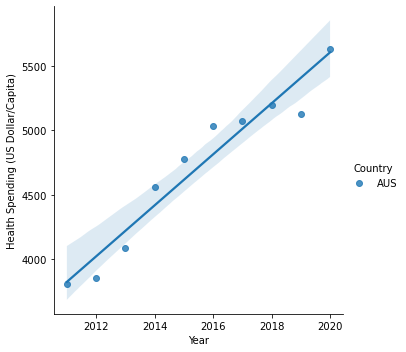

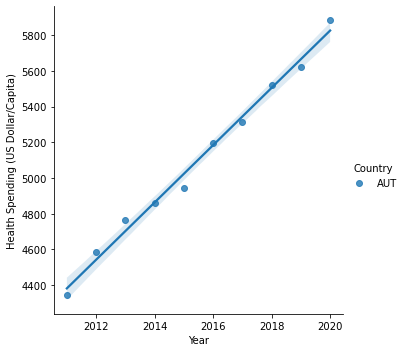

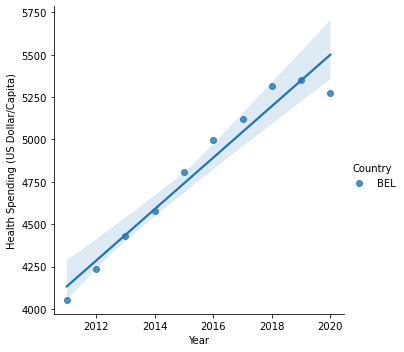

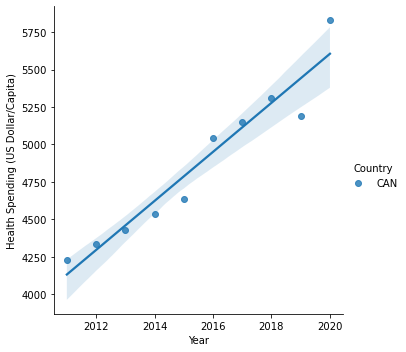

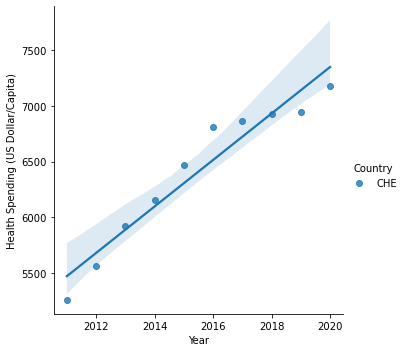

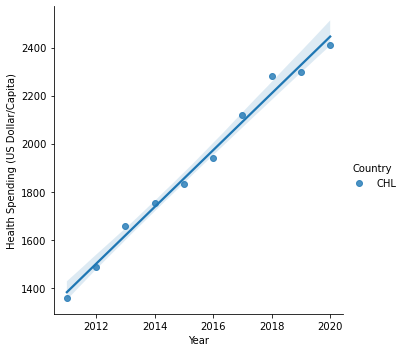

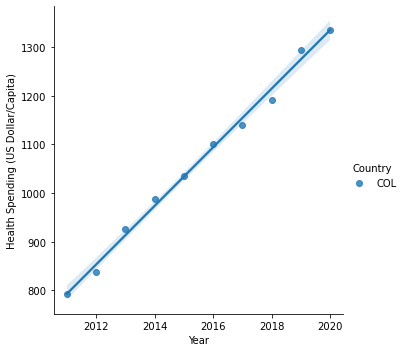

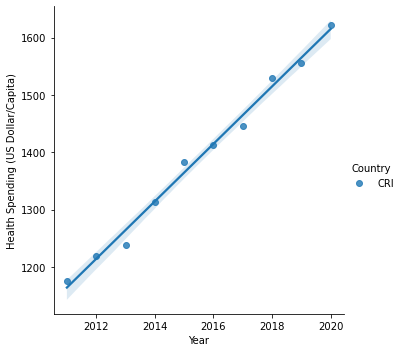

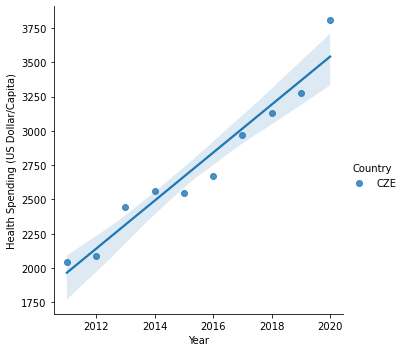

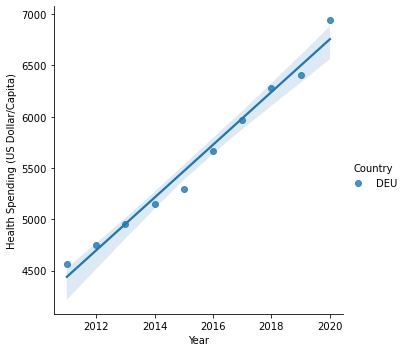

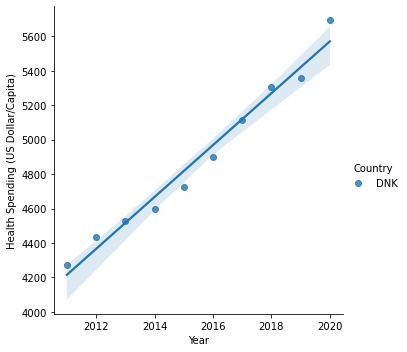

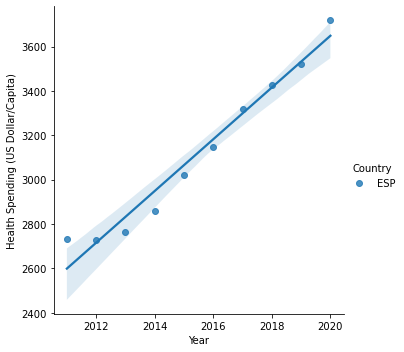

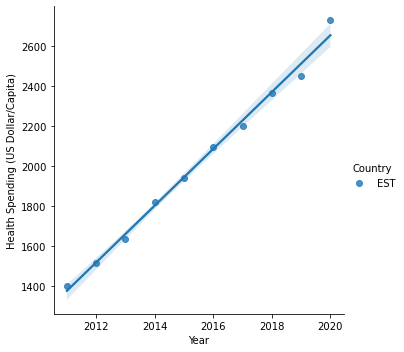

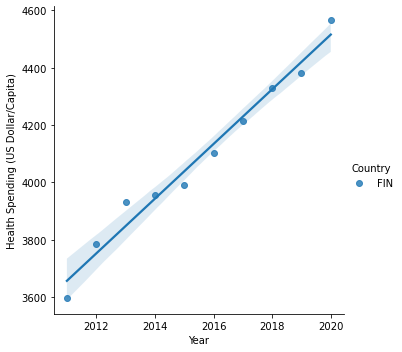

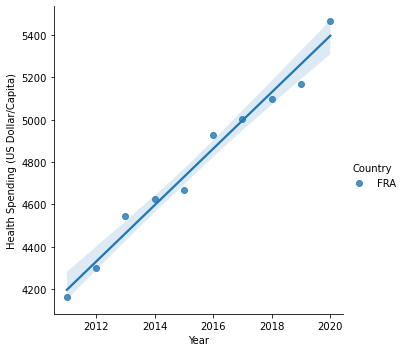

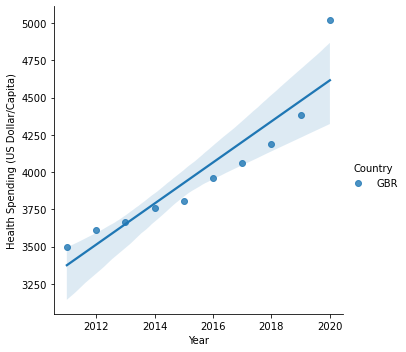

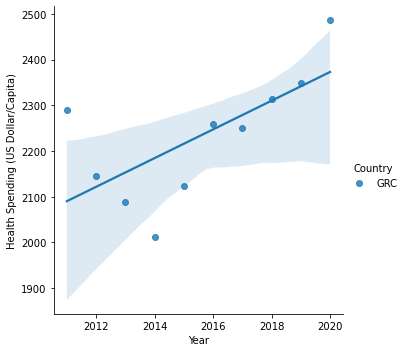

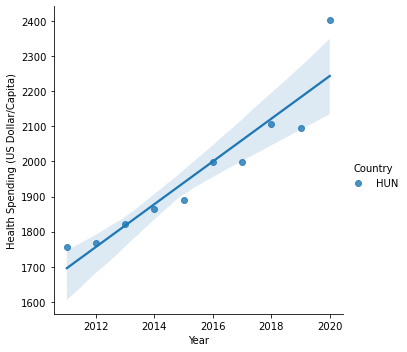

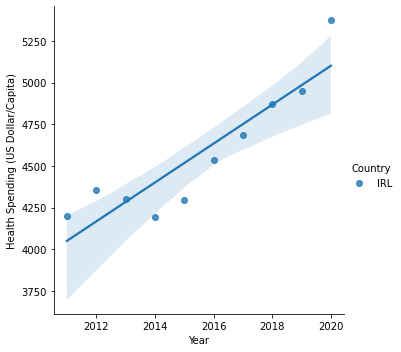

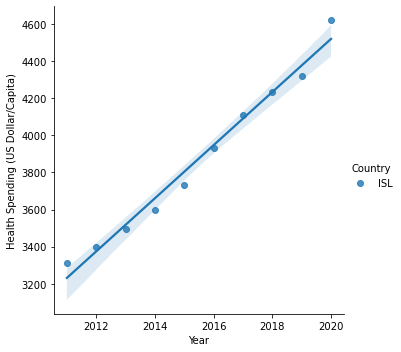

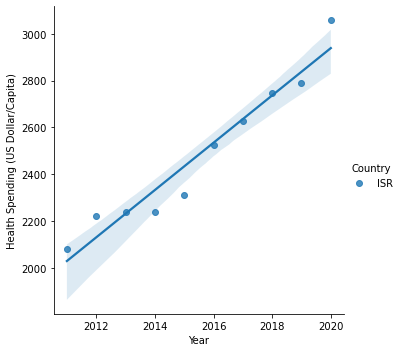

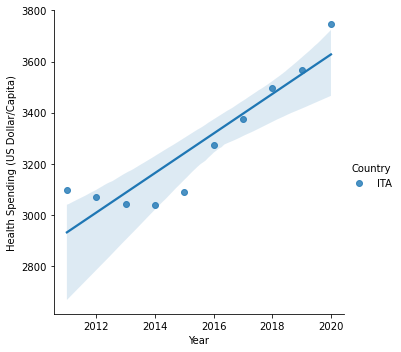

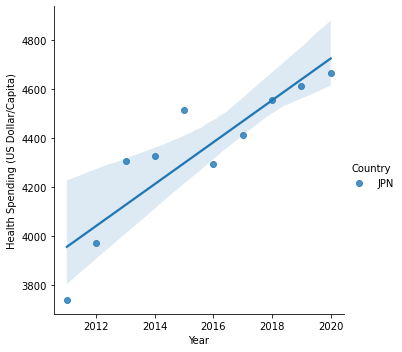

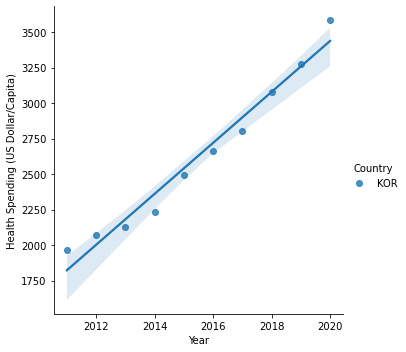

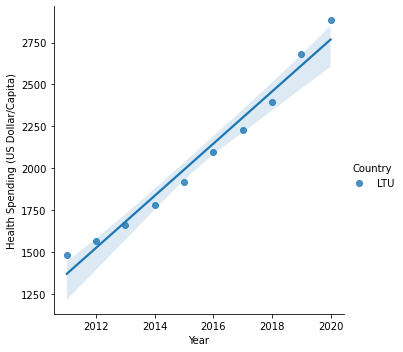

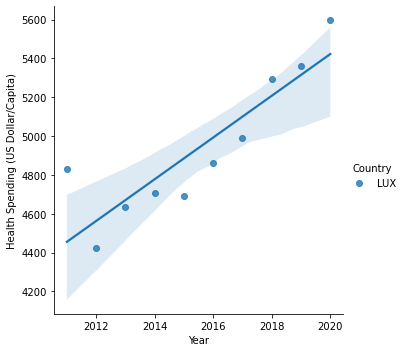

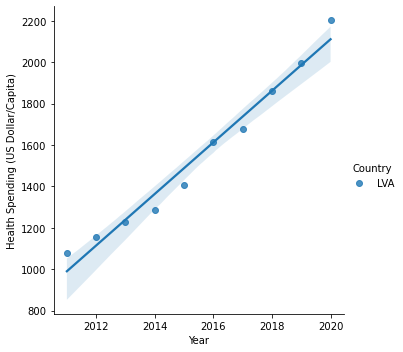

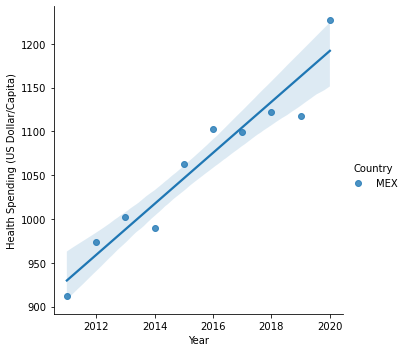

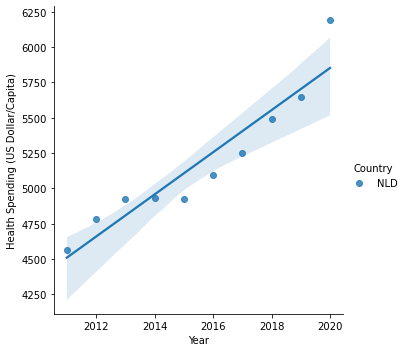

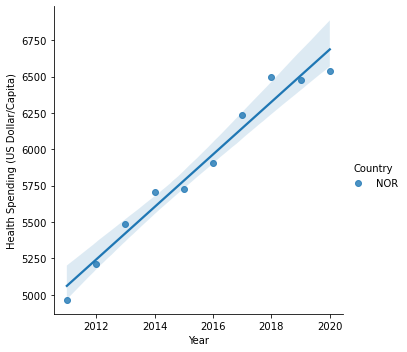

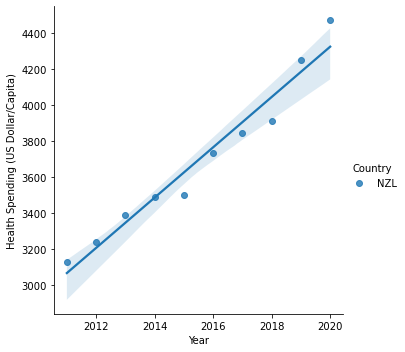

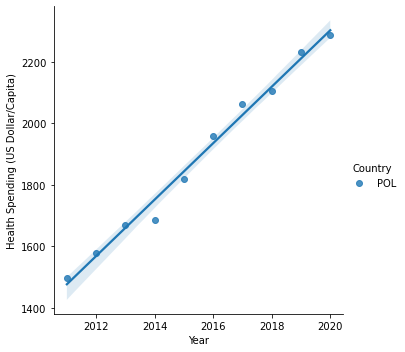

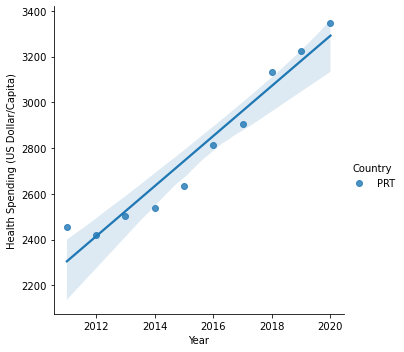

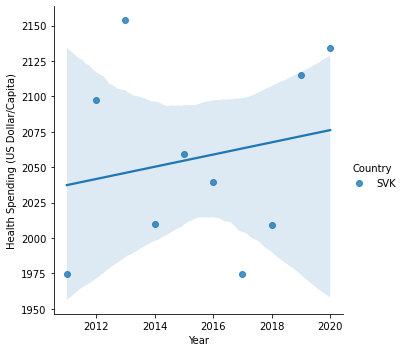

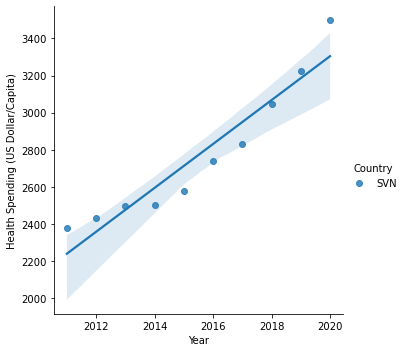

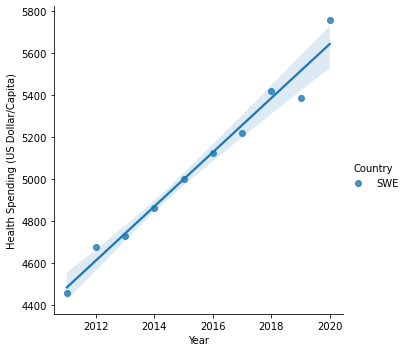

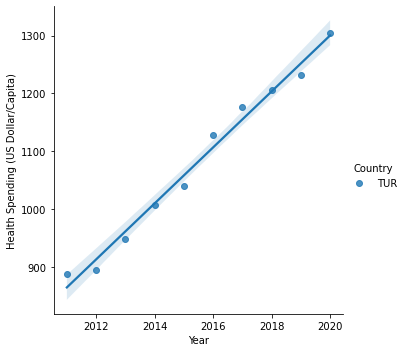

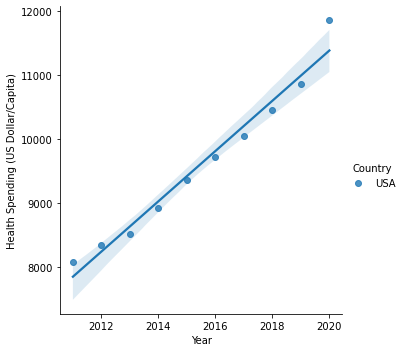

In [41]:
# Create plotting function for Health Spending 
def plot_by_loc(i):
    sns.lmplot(data=i, x='Year', y='Health Spending (US Dollar/Capita)', hue='Country')
        
# applying this function retrieve graphs of each country       
Health_spending_df.groupby('Country').apply(plot_by_loc)



#### Employment Rate: Linear Regression per Country

In [ ]:
# Define your function for EmploymentRate
def slope_coefficient(df):
    x= df[['Year']]
    y= df[['EmploymentRate']]
    model= LinearRegression().fit(x, y)
    return model.coef_


#applying function to this dataset
er_data = Employment_rate_df.groupby('Country')
print(er_data.apply(slope_coefficient))

In [ ]:
# Create plotting function for EmploymentRate
def plot_by_loc(i):
    sns.lmplot(data=i, x='Year', y='EmploymentRate', hue='Country')
        
# applying this function to retrieve graphs of each country       
Employment_rate_df.groupby('Country').apply(plot_by_loc)

#### Percentage of Tertiary Education Received: Linear Regression per Country

In [34]:
# Define your function for Percentage of Tertiary Education Received 
def slope_coefficient(df):
    x= df[['Year']]
    y= df[['Percentage (25-64yrs)']]
    model= LinearRegression().fit(x, y)
    return model.coef_


#applying function to this dataset
te_data = Tertiary_education_df.groupby('Country')
print(te_data.apply(slope_coefficient))

Country
AUS     [[1.1033095272727267]]
AUT     [[0.6948433030303031]]
BEL     [[0.8745889090909093]]
CAN     [[0.9988703818181816]]
CHE     [[1.2786866060606055]]
CHL     [[1.4447265204918032]]
COL    [[0.44183007142857134]]
CRI    [[0.23811220606060607]]
CZE      [[0.733838121212121]]
DEU     [[0.3265068121212121]]
DNK     [[0.7457669333333334]]
ESP     [[0.8169694545454543]]
EST     [[0.6082302666666667]]
FIN     [[0.9246413878787874]]
FRA     [[1.0204578606060604]]
GBR     [[0.9992735151515146]]
GRC     [[0.7721775212121209]]
HUN     [[0.5866519878787879]]
IRL     [[1.2302649575757572]]
ISL     [[0.9885176727272725]]
ISR    [[0.49860630909090875]]
ITA     [[0.5710812666666665]]
JPN     [[0.8798903818181812]]
KOR     [[1.1613663212121208]]
LTU      [[1.234043442424242]]
LUX     [[1.3243968181818182]]
LVA      [[0.993890303030303]]
MEX      [[0.432343133333333]]
NLD     [[1.0219776242424237]]
NOR      [[0.773551006060606]]
NZL     [[0.9481012500000003]]
POL     [[1.0569288424242418]]


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Empty DataFrame
Columns: []
Index: []

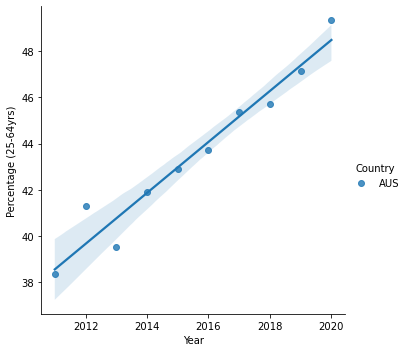

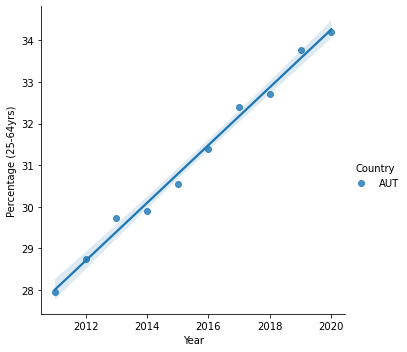

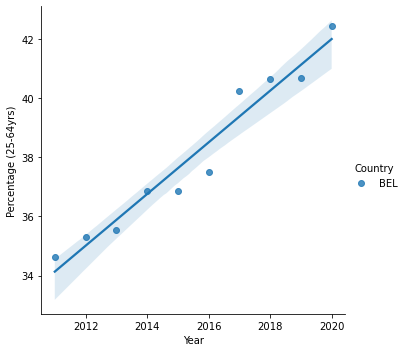

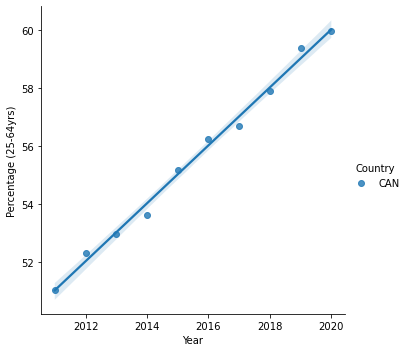

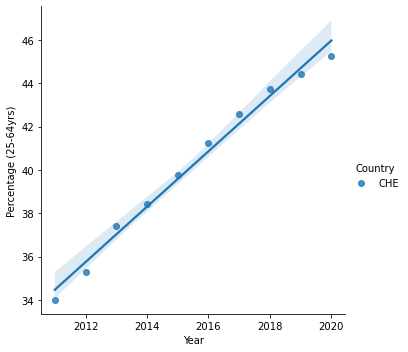

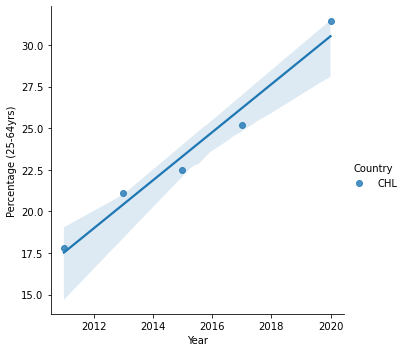

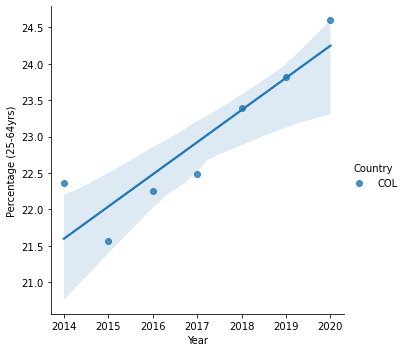

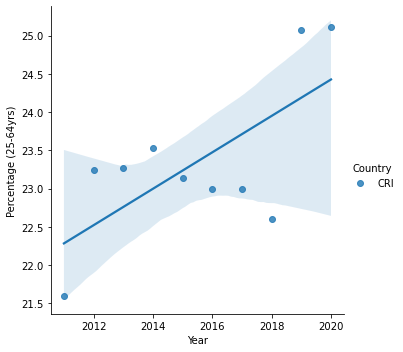

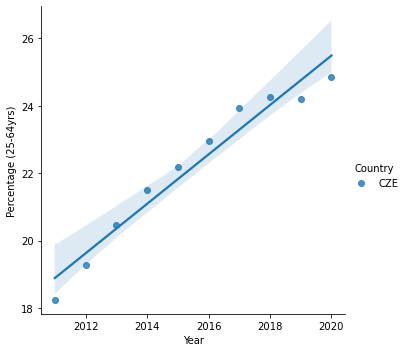

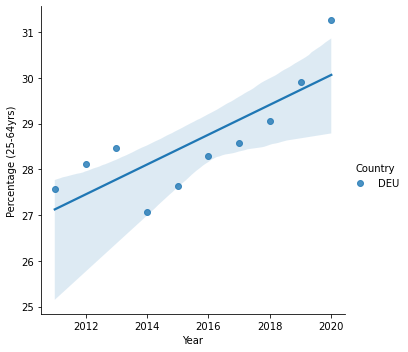

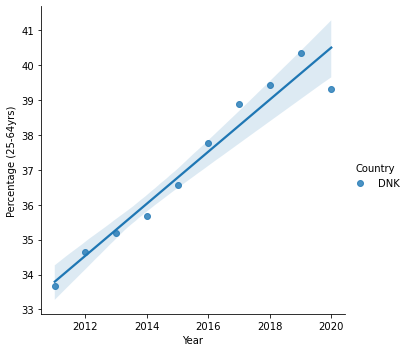

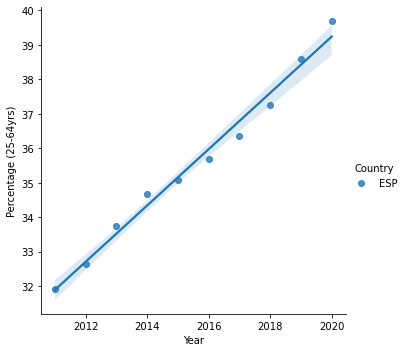

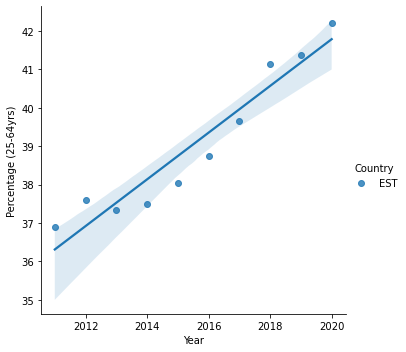

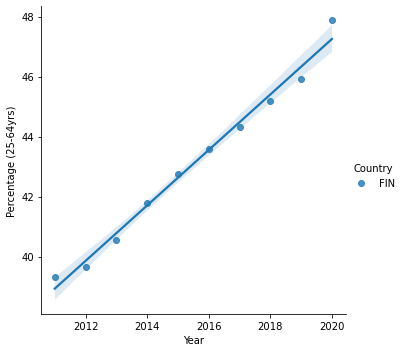

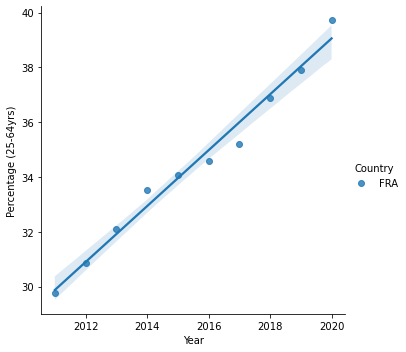

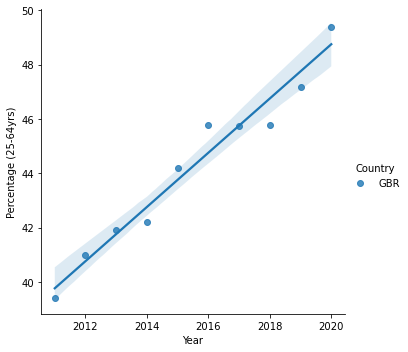

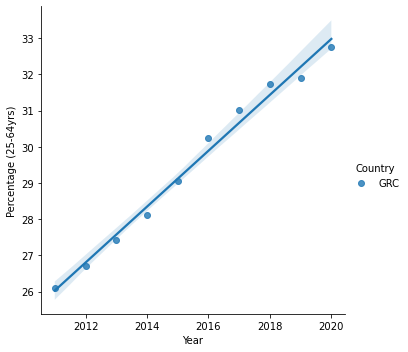

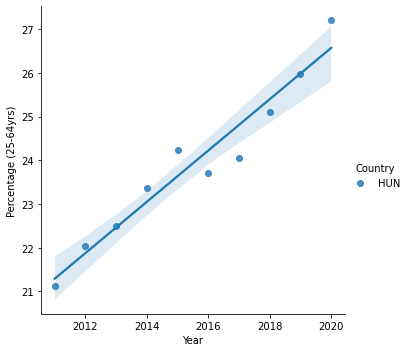

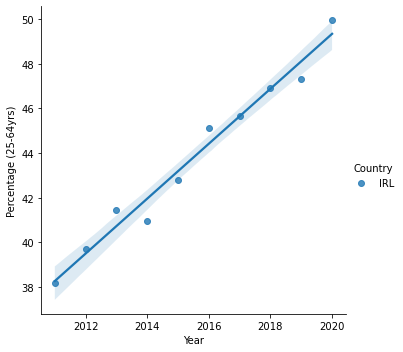

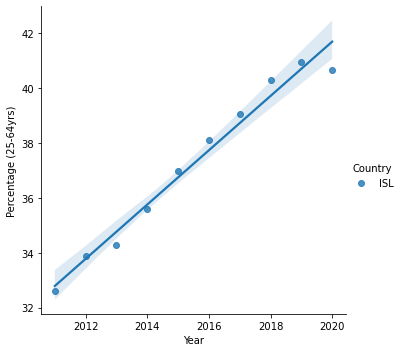

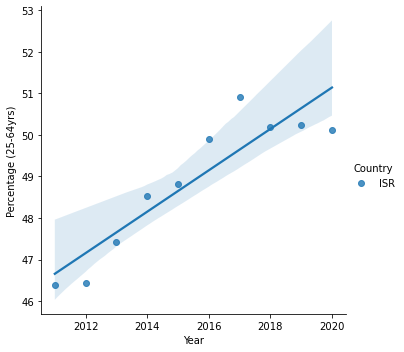

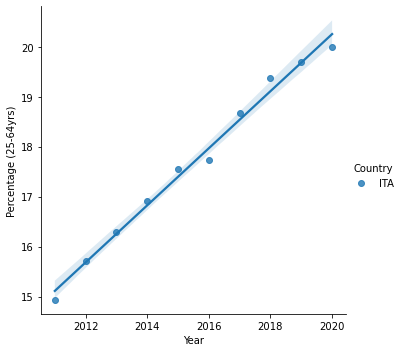

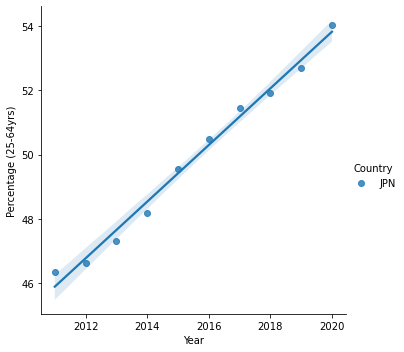

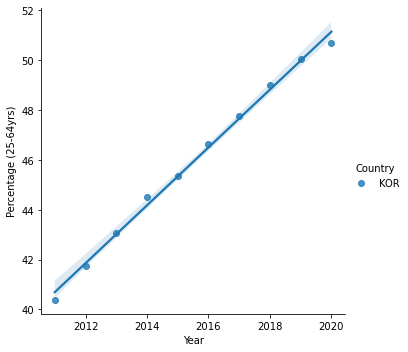

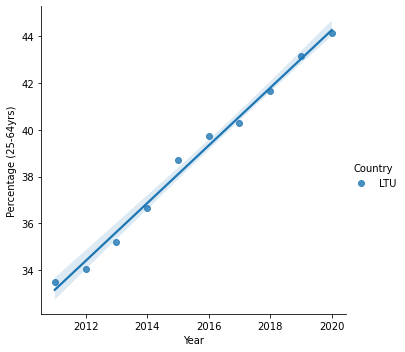

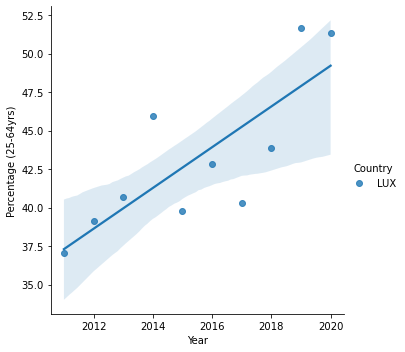

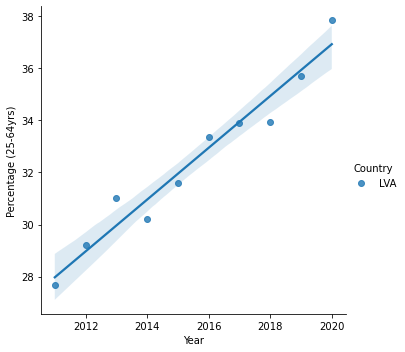

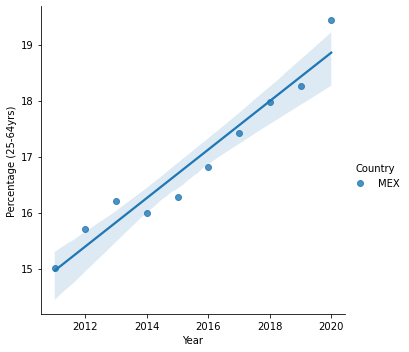

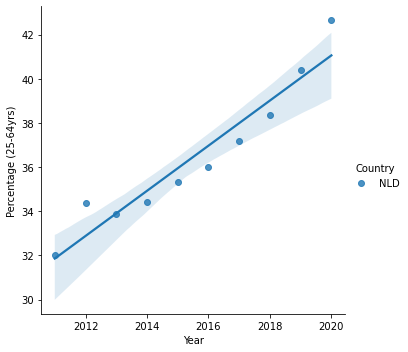

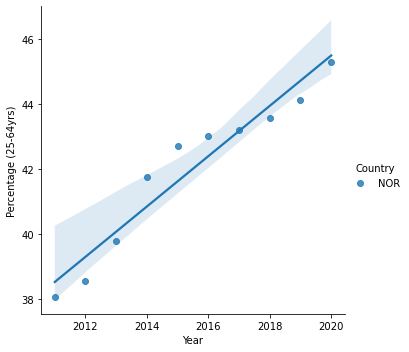

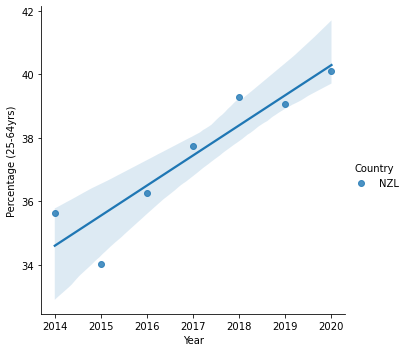

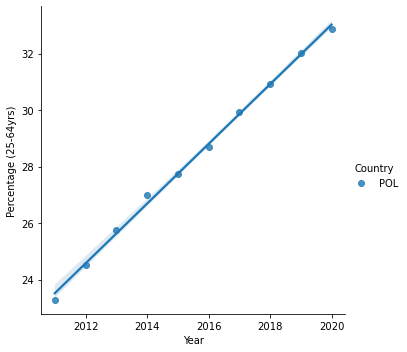

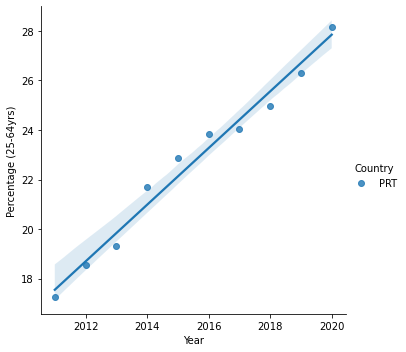

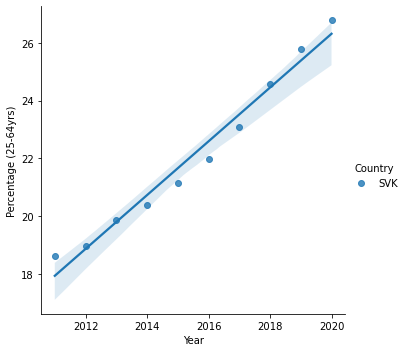

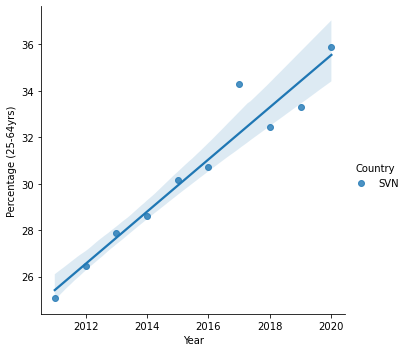

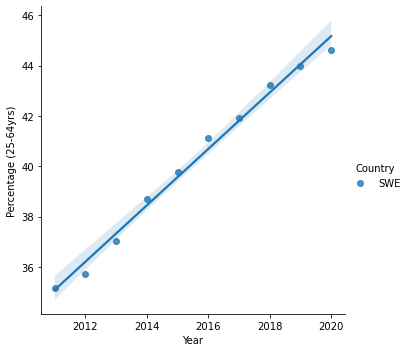

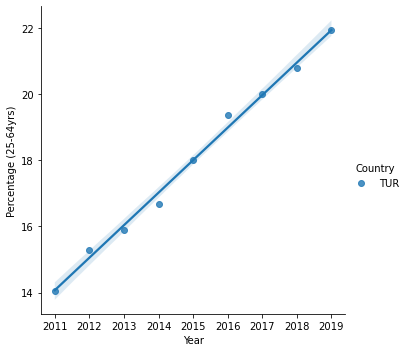

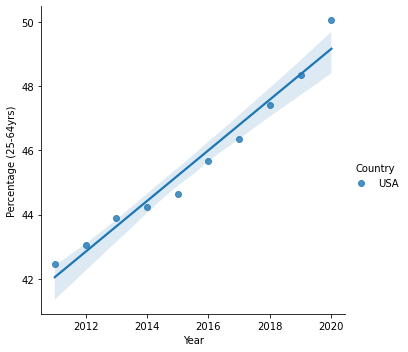

In [23]:
# Create plotting function for Percentage of Tertiary Education Received
def plot_by_loc(i):
    sns.lmplot(data=i, x='Year', y='Percentage (25-64yrs)', hue='Country')
    
# applying this function to get graphs per country       
Tertiary_education_df.groupby('Country').apply(plot_by_loc)


#### Internet Access: Linear Regression per Country

In [35]:
# Define your function for Internet Access 
def slope_coefficient(df):
    x= df[['Year']]
    y= df[['Internet Access']]
    model= LinearRegression().fit(x, y)
    return model.coef_

#applying function to this dataset
ia_data = Internet_access_df.groupby('Country')
print(ia_data.apply(slope_coefficient))

Country
AUS     [[0.7774999999999996]]
AUT     [[1.6644472727272719]]
BEL     [[1.5870951515151503]]
CAN     [[1.5375757575757563]]
CHE     [[1.4113612394366193]]
CHL      [[5.518711713428573]]
COL       [[3.05181074864865]]
CRI      [[5.286570586606058]]
CZE     [[2.3074351515151497]]
DEU     [[1.3539224242424241]]
DNK      [[0.513705454545454]]
ESP     [[3.5234812121212107]]
EST      [[2.254036969696968]]
FIN     [[1.2152490909090905]]
FRA     [[1.5835233333333345]]
GBR     [[1.4545715151515142]]
GRC     [[3.4230436363636354]]
HUN      [[2.758199999999999]]
IRL     [[1.4796606060606061]]
ISL     [[0.5652823170731707]]
ISR     [[0.7580132366666672]]
ITA     [[3.0305030303030294]]
KOR    [[0.29797928733333295]]
LTU      [[2.705517575757575]]
LUX    [[0.23807878787878814]]
LVA     [[2.5402593939393934]]
MEX      [[4.341204209333331]]
NLD     [[0.5377363636363632]]
NOR     [[0.5778096969696964]]
NZL                    [[0.0]]
POL     [[2.5150509090909083]]
PRT     [[3.0518309090909077]]


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Empty DataFrame
Columns: []
Index: []

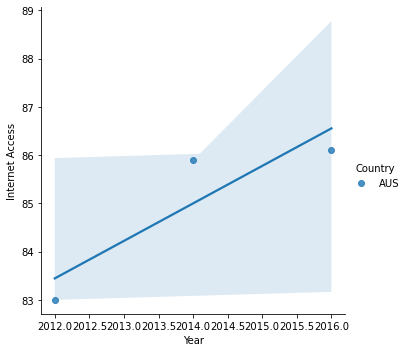

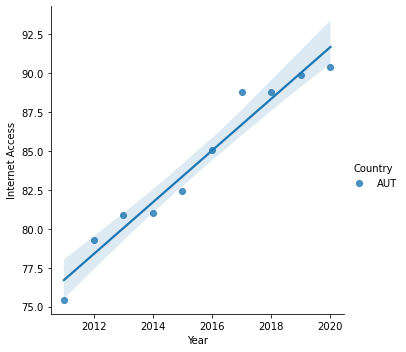

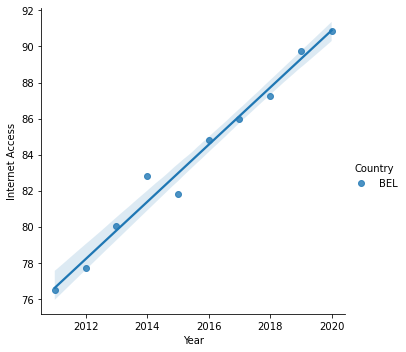

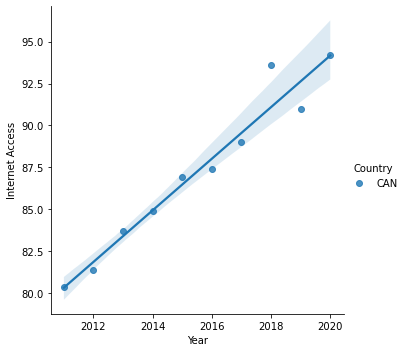

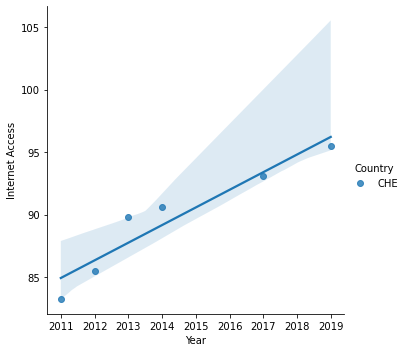

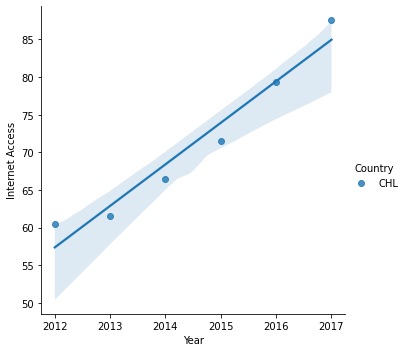

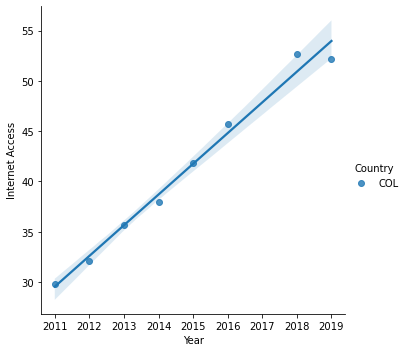

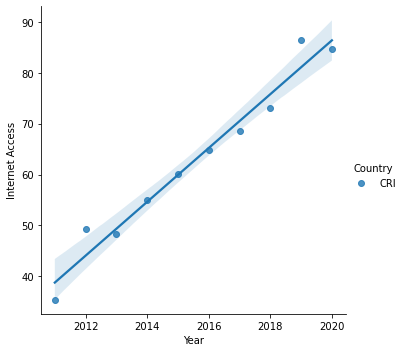

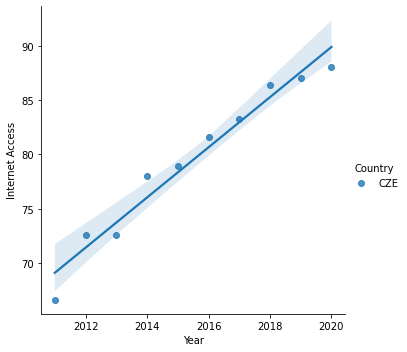

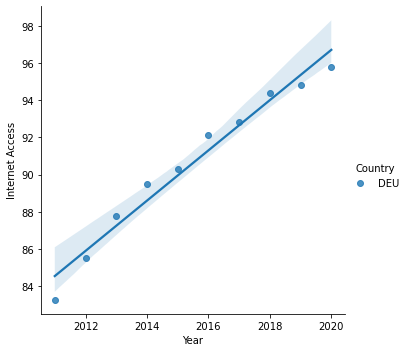

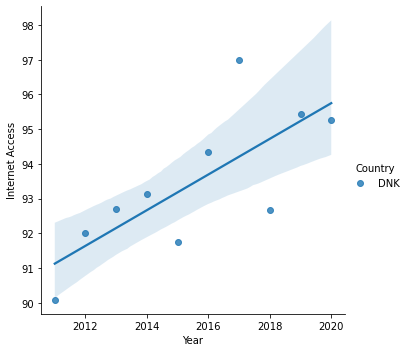

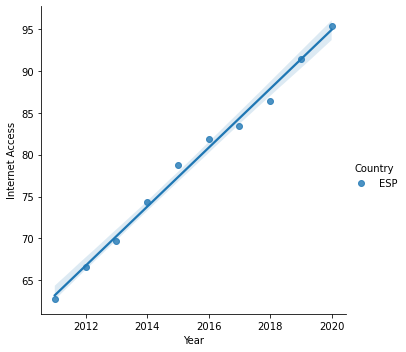

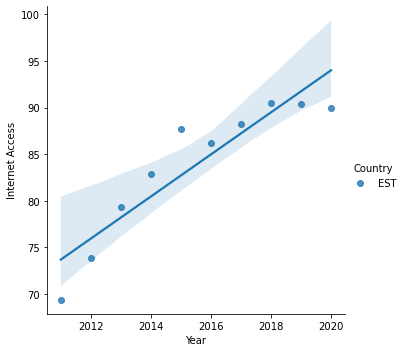

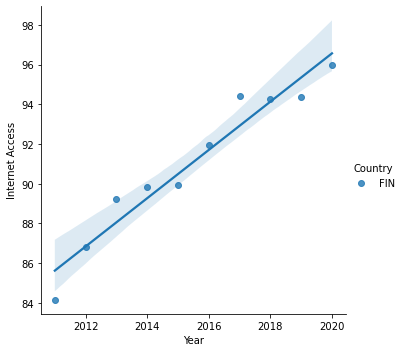

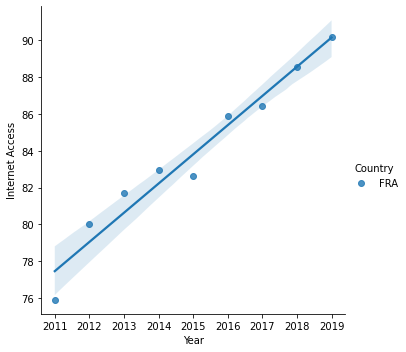

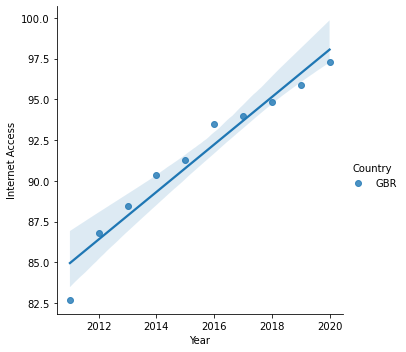

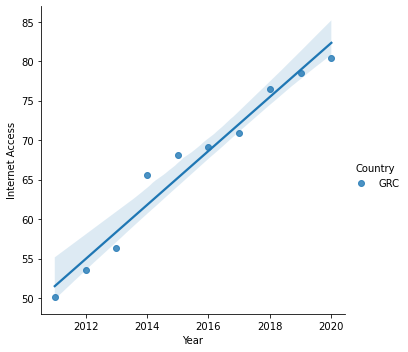

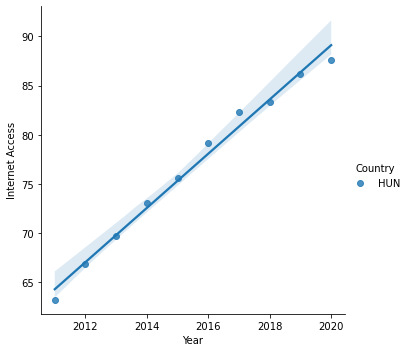

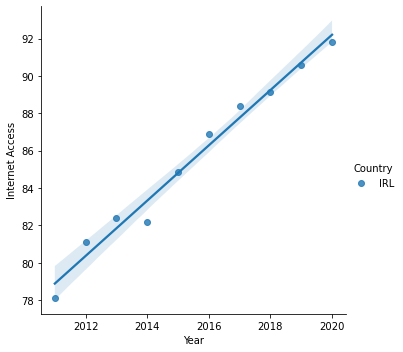

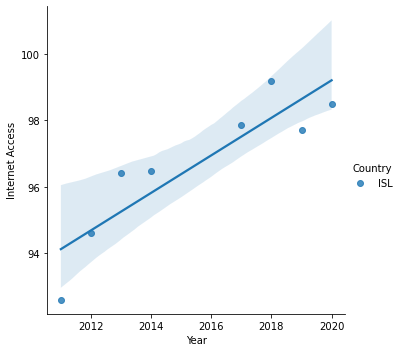

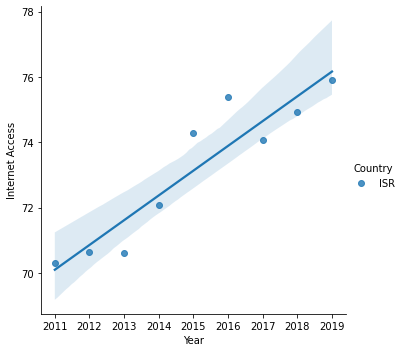

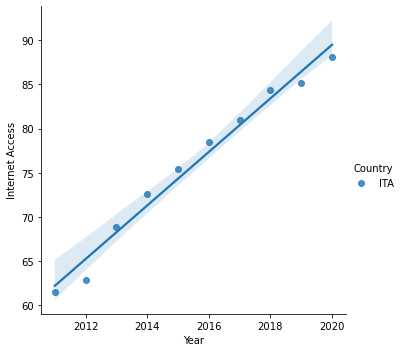

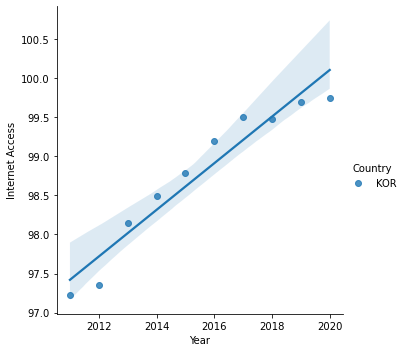

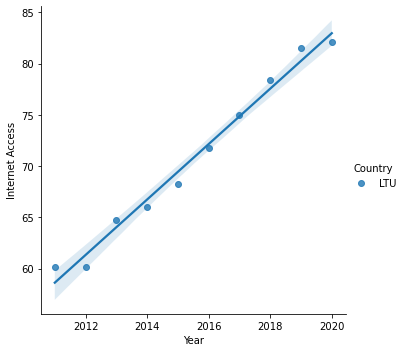

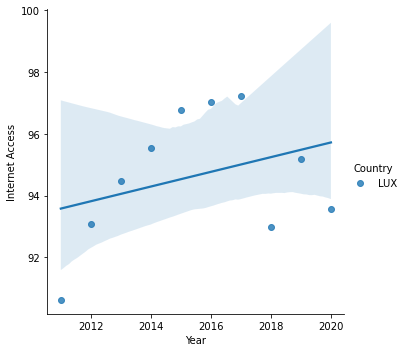

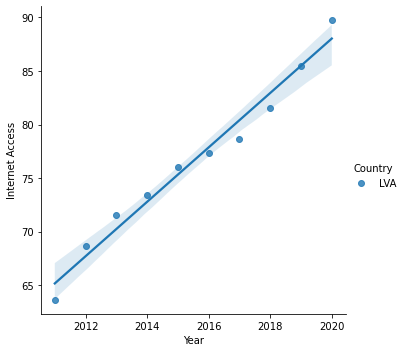

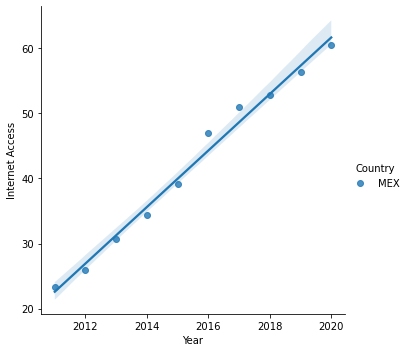

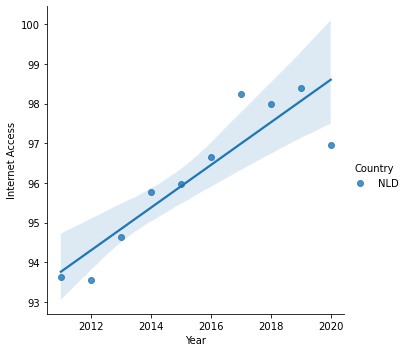

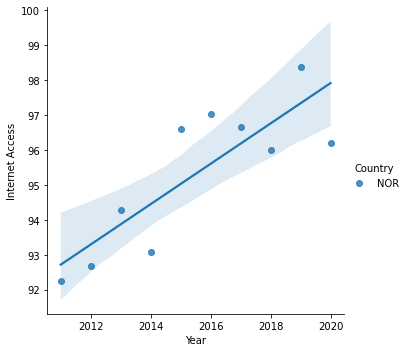

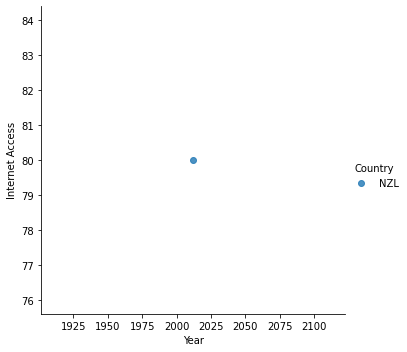

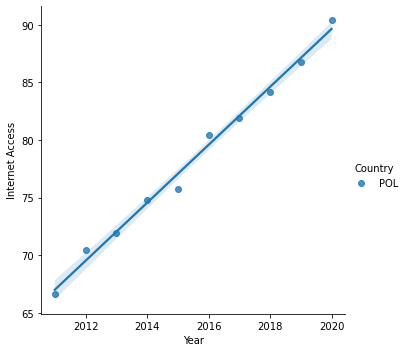

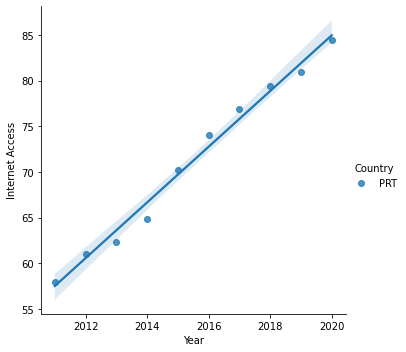

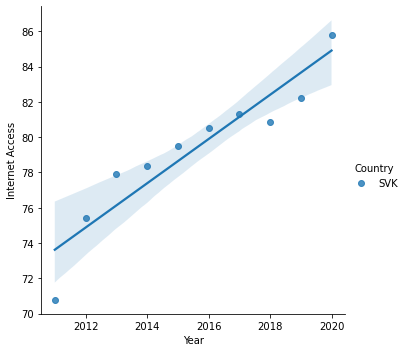

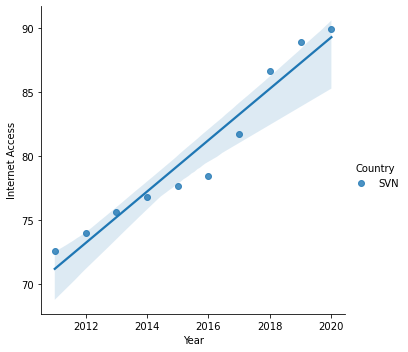

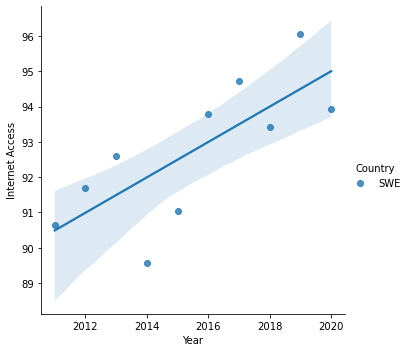

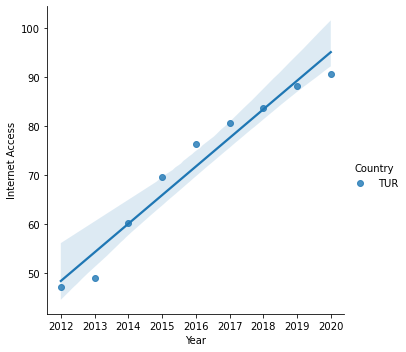

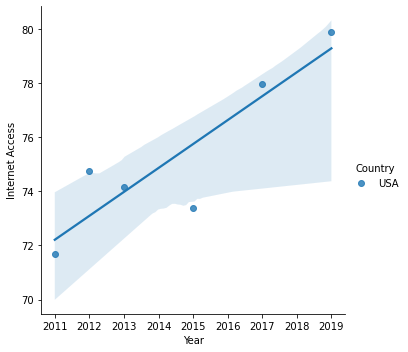

In [37]:
# Create plotting function for Internet Access
def plot_by_loc(i):
    sns.lmplot(data=i, x='Year', y='Internet Access', hue='Country')
        
# applying this function to this factor to produce graphs       
Internet_access_df.groupby('Country').apply(plot_by_loc)

## Questions for Reviewers:
- Is the data that we collected extensive enough?
    - Is the length of the dataset sufficient?
    - Should we decrease or increase the number of attributes? (Employment rate, internet access, etc..)
- What would be the best way to handle missing data?
    - As of now, for the data analysis, we got rid of rows with NaN because it caused complication for plotting. However, because of this, the dataset for "Comprehensive Analysis" is miss 
- Is it necessary to keep the number rows consistent for different datasets?
- Is there anymore data cleaning that needs to be done?
- Would we have to make a function for renaming the column variables since it feels a little redundant?